# Introduction to the Team and Problem Statement


This is Team Nasi Lemak's notebook for L’Oréal x Monash Datathon 2025

Our team members are:
- Sean Lee Jing Xuan
- Tan Jin Xiang
- Teng Wen Hong
- Tan Hui Zhe

**Problem Statement**

Our project tackles the TrendSpotter challenge by analyzing video and comment data to uncover emerging beauty trends. Using engagement metrics and sentiment analysis, we detect which topics are rising, peaking, or declining, and present these insights through an interactive dashboard. This helps L’Oréal create online content that is timely, relevant, and aligned with what consumers care about right now.

# Dataset Review

The dataset used in this project appears to contain information about YouTube videos related to beauty and lifestyle trends. Based on the columns, it includes metadata like video ID, publication date, channel ID, title, description, tags, language information, duration, view count, like count, and topic categories. It seems to be a collection of videos aimed at identifying emerging trends in the beauty industry.


By analyzing this type of dataset, we can go beyond raw numbers and uncover meaningful patterns in consumer behavior. Metrics like views, likes, and comments reveal which topics are gaining traction, while video titles, tags, and descriptions provide keywords and themes that drive engagement. Combined with publication dates and categories, this allows us to detect whether a trend is emerging, peaking, or declining over time. Ultimately, these insights can guide L’Oréal in choosing the right content directions and keywords for online posts, ensuring their digital presence stays aligned with what audiences are most interested in.

# Initial Data Exploration

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file into a DataFrame using the 'python' engine and skip bad lines
df = pd.read_csv('/content/drive/MyDrive/datasets/videos.csv', on_bad_lines='skip')

# Display the first 5 rows of the DataFrame
display(df.head())

# Display the column names and their data types
display(df.info())

#use this if wanna see whole data without '...'
#pd.set_option('display.max_colwidth', None)
pd.reset_option('display.max_colwidth')

kind  videoId                publishedAt  channelId  \
0  youtube#video    85806  2024-01-15 00:59:29+00:00      33807   
1  youtube#video    30556  2023-10-27 19:32:16+00:00      46650   
2  youtube#video    51771  2024-09-28 01:23:22+00:00      14346   
3  youtube#video    45298  2023-07-13 15:19:28+00:00      50139   
4  youtube#video    43611  2023-04-29 18:47:37+00:00       8143   

                                               title description tags  \
0  Unlocking the Benefits of Face Masks for Skin ...         NaN  NaN   
1  Get ready for the Magic💚💜🤍💝✨ #hydration #glowi...         NaN  NaN   
2  #trending #makeup #beautymakeup #yslbeauty #lu...         NaN  NaN   
3                              #shortvedio #balayage         NaN  NaN   
4  Full Face of Merit Beauty 🤎 featuring new Flus...         NaN  NaN   

  defaultLanguage defaultAudioLanguage contentDuration  viewCount  likeCount  \
0           en-US                en-US            PT9S       72.0        0.0   
1             NaN                  NaN           PT45S      257.0        7.0   
2             NaN                en-US           PT19S      164.0        4.0   
3             NaN                  NaN           PT14S     1207.0       20.0   
4             NaN                   en           PT56S     8647.0      268.0   

   favouriteCount  commentCount  \
0             0.0           0.0   
1             0.0           0.0   
2             0.0           2.0   
3             0.0           0.0   
4             0.0           7.0   

                                     topicCategories  
0  ['https://en.wikipedia.org/wiki/Health', 'http...  
1  ['https://en.wikipedia.org/wiki/Lifestyle_(soc...  
2  ['https://en.wikipedia.org/wiki/Lifestyle_(soc...  
3  ['https://en.wikipedia.org/wiki/Lifestyle_(soc...  
4  ['https://en.wikipedia.org/wiki/Lifestyle_(soc...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92759 entries, 0 to 92758
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   kind                  92759 non-null  object 
 1   videoId               92759 non-null  int64  
 2   publishedAt           92759 non-null  object 
 3   channelId             92759 non-null  int64  
 4   title                 92759 non-null  object 
 5   description           35237 non-null  object 
 6   tags                  20891 non-null  object 
 7   defaultLanguage       15785 non-null  object 
 8   defaultAudioLanguage  29956 non-null  object 
 9   contentDuration       91492 non-null  object 
 10  viewCount             91490 non-null  float64
 11  likeCount             86630 non-null  float64
 12  favouriteCount        91492 non-null  float64
 13  commentCount          90294 non-null  float64
 14  topicCategories       91228 non-null  object 
dtypes: float64(4), int6

None

# Data Cleaning and Preprocessing

Since the first column, `kind`, has the same entry for all rows, we will drop this column.

In [3]:
# Drop the 'kind' column
df = df.drop(columns=['kind'])

# Display the column names and their data types to verify the change
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92759 entries, 0 to 92758
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   videoId               92759 non-null  int64  
 1   publishedAt           92759 non-null  object 
 2   channelId             92759 non-null  int64  
 3   title                 92759 non-null  object 
 4   description           35237 non-null  object 
 5   tags                  20891 non-null  object 
 6   defaultLanguage       15785 non-null  object 
 7   defaultAudioLanguage  29956 non-null  object 
 8   contentDuration       91492 non-null  object 
 9   viewCount             91490 non-null  float64
 10  likeCount             86630 non-null  float64
 11  favouriteCount        91492 non-null  float64
 12  commentCount          90294 non-null  float64
 13  topicCategories       91228 non-null  object 
dtypes: float64(4), int64(2), object(8)
memory usage: 9.9+ MB


None

**Exploring favouriteCount column**

We found that the `favouriteCount` column contains only '0' and null values. Hence this column will be dropped.

In [4]:
# Get the frequency of each unique entry in the 'favouriteCount' column
favourite_count_frequencies = df['favouriteCount'].value_counts()

# Display the frequencies
print("Frequency of unique entries in 'favouriteCount':")
print(favourite_count_frequencies)

# Count the number of null entries in the 'favouriteCount' column
null_favourite_counts = df['favouriteCount'].isnull().sum()

# Display the result
print(f"Number of null values in 'favouriteCount': {null_favourite_counts}")

# Drop the and 'favouriteCount' columns if they exist
columns_to_drop = ['favouriteCount']
existing_columns_to_drop = [col for col in columns_to_drop if col in df.columns]
if existing_columns_to_drop:
    df = df.drop(columns=existing_columns_to_drop)

Frequency of unique entries in 'favouriteCount':
favouriteCount
0.0    91492
Name: count, dtype: int64
Number of null values in 'favouriteCount': 1267


**Combine all #tags into 'allTags'**

Due to keywords (HashTags) appear in multiple columns, hence we will extract the keywords out, combine them, and input them into a new column, `allTags`.

In [5]:
# Create a new column 'hashTags' by extracting hashtags from the 'title' and 'description' columns
df['hashTags'] = df['title'].str.findall(r'#\w+').str.join(' ')
df['hashTags2'] = df['description'].str.findall(r'#\w+').str.join(' ')

# Combine 'tags', 'hashTags', and 'hashTags2' into 'hashTags'
# Fill NaN values with empty strings before combining
df['hashTags'] = df['tags'].fillna('') + ' ' + df['hashTags'].fillna('') + ' ' + df['hashTags2'].fillna('')

# Drop the original 'hashTags2' column
df = df.drop(columns=['hashTags2'])

# Check if 'allTags' column exists and drop it if it does

# Rename the 'hashTags' column to 'allTags'
df = df.rename(columns={'hashTags': 'allTags'})

# Get the list of columns
cols = df.columns.tolist()

# Find the index of 'tags' and 'defaultLanguage'
tags_index = cols.index('tags')
defaultLanguage_index = cols.index('defaultLanguage')

# Remove 'allTags' from the list
cols.remove('allTags')

# Insert 'allTags' between 'tags' and 'defaultLanguage'
cols.insert(tags_index + 1, 'allTags')

# Reindex the DataFrame with the new column order
df = df[cols]

The rows where `allTags` column is empty are dropped.

In [6]:
# Drop rows where 'hashTags' is an empty string
df_filtered = df[df['allTags'].str.strip() != '']

# Display the number of rows before and after dropping
print(f"Number of rows before dropping: {len(df)}")
print(f"Number of rows after dropping: {len(df_filtered)}")

# Display the first few rows of the filtered DataFrame
display(df_filtered.head())

df = df_filtered

Number of rows before dropping: 92759
Number of rows after dropping: 74700


videoId                publishedAt  channelId  \
1    30556  2023-10-27 19:32:16+00:00      46650   
2    51771  2024-09-28 01:23:22+00:00      14346   
3    45298  2023-07-13 15:19:28+00:00      50139   
4    43611  2023-04-29 18:47:37+00:00       8143   
5    32398  2021-10-06 01:28:59+00:00      39642   

                                               title description  \
1  Get ready for the Magic💚💜🤍💝✨ #hydration #glowi...         NaN   
2  #trending #makeup #beautymakeup #yslbeauty #lu...         NaN   
3                              #shortvedio #balayage         NaN   
4  Full Face of Merit Beauty 🤎 featuring new Flus...         NaN   
5  body lotion fit tuber 👈|| girls body lotion 👆|...         NaN   

                                                tags  \
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   
5  ['body lotion fit tuber', 'fit tuber body loti...   

                                             allTags defaultLanguage  \
1   #hydration #glowingskin #nomakeuplook #skincare              NaN   
2   #trending #makeup #beautymakeup #yslbeauty #l...             NaN   
3                             #shortvedio #balayage              NaN   
4                   #merit #sephora #makeuptutorial              NaN   
5  ['body lotion fit tuber', 'fit tuber body loti...             NaN   

  defaultAudioLanguage contentDuration  viewCount  likeCount  commentCount  \
1                  NaN           PT45S      257.0        7.0           0.0   
2                en-US           PT19S      164.0        4.0           2.0   
3                  NaN           PT14S     1207.0       20.0           0.0   
4                   en           PT56S     8647.0      268.0           7.0   
5                  NaN           PT17S     1366.0       15.0           0.0   

                                     topicCategories  
1  ['https://en.wikipedia.org/wiki/Lifestyle_(soc...  
2  ['https://en.wikipedia.org/wiki/Lifestyle_(soc...  
3  ['https://en.wikipedia.org/wiki/Lifestyle_(soc...  
4  ['https://en.wikipedia.org/wiki/Lifestyle_(soc...  
5  ['https://en.wikipedia.org/wiki/Lifestyle_(soc...

Creating new column that stores array form of `allTags`.

In [7]:
import pandas as pd
import re
import ast

def parse_tags(tag_string):
    if pd.isna(tag_string):
        return []

    tags = []

    # Try to parse the beginning of the string as a list
    list_match = re.match(r"\[.*?\]", tag_string)
    if list_match:
        list_string = list_match.group(0)
        try:
            list_tags = ast.literal_eval(list_string)
            if isinstance(list_tags, list):
                for item in list_tags:
                    if isinstance(item, str) and '#' in item:
                        # Split by '#' and clean each tag
                        split_tags = [t.strip().lstrip('#') for t in item.split('#') if t.strip()]
                        tags.extend(split_tags)
                    else:
                        tags.append(str(item).strip().lstrip('#'))
            # Remove the parsed list string from the original string
            tag_string = tag_string[list_match.end():].strip()
        except (ValueError, SyntaxError):
            pass  # Handle cases where ast.literal_eval fails

    # Extract any remaining hashtags from the rest of the string
    tags.extend([tag.lstrip('#') for tag in re.findall(r'#\w+', tag_string)])

    return tags

# Apply the function to the 'allTags' column
df['allTags_array'] = df['allTags'].apply(parse_tags)

# Reorder columns: insert 'allTags_array' right after 'allTags'
cols = df.columns.tolist()
if 'allTags' in cols and 'allTags_array' in cols:
    allTags_index = cols.index('allTags')
    cols.remove('allTags_array')
    cols.insert(allTags_index + 1, 'allTags_array')
    df = df[cols]

# Display the first few rows to verify
display(df[['allTags', 'allTags_array']].head(50))

allTags  \
1    #hydration #glowingskin #nomakeuplook #skincare    
2    #trending #makeup #beautymakeup #yslbeauty #l...   
3                              #shortvedio #balayage    
4                    #merit #sephora #makeuptutorial    
5   ['body lotion fit tuber', 'fit tuber body loti...   
6     #bride #bridemakeup #dulhanwalifeeling #brid...   
7     #best #makeup #eyebrows #products #beauty #fyp    
8    #blackgirlmakeup #makeup #blackgirlmakeupvideos    
9    #jenny #kpop #skincare #skincaregoals #glowup...   
11                                             #grwm    
14                 #makeup #grwmmakeup #fyp #bronzer    
15  ['stay at home mom', 'mom life', 'mom vlog', '...   
17  ['makeup', 'makeup tutorial', 'easy makeup', '...   
19  ['Anti-aging', 'Anti-aging massage', 'Facial m...   
20  ['#serum', 'Whitening serum', '4 in 1 serum', ...   
21  ['#shorts', 'skincare', 'reels'] #instantglow ...   
22                   #fok #blackgirlmagic #blackqueen   
23          #beautyparlour #kasturi #haircolor #love    
24   #hairstylehairstyle #hairstyle #hair #shortvi...   
25   #makeup #makeupartist #mua #highlights #conto...   
26   #highlights #blondehair #haircut #hair #hairs...   
27  ['shorts', 'viral', 'lawanstigma', 'pria', 'be...   
28   #haircut #youtube #instagram #reels #hair #ha...   
29     #frizzyhair #dryhair #unrulyhair #nanoplastia    
30   #makeup #lipstick #makeuptutorial #makeuplook...   
31           #viral #shorts #ytshorts #youtubeshorts    
32   #makeupfordarkskin #grwm #girlsnight #girlsni...   
34                   #bodysplashs #perfumes #perfume    
35                       #thehairreal #hairextension    
36  ['#yt #grwm #ytshorts #shorts #transition #mun...   
37  ['#microblading #microbladingeyebrows #facialb...   
38   #makeup #lipstick #makeuptutorial #red #hairs...   
39      #aqualogica #sunscreen #grwm #getreadywithme    
40   #trending #mask #makeup #shorts #viral #youtu...   
41  ['summer sunkissed makeup look', 'summer fresh...   
42   #Shorts #short #beautiful #beauty #fashion #g...   
43  ['fashion', 'fashion advice', 'clean girl', 'c...   
44   #love #song #hair #youtubeshorts #makeupartis...   
45  ['#msnicolej', '#mslatruth', '#ombre', '#micro...   
46   #grwm #grwms #grwmvideo #grwmshorts #makeupfi...   
48           #global #highlights #youtubeshorts #sam    
51   #wrinkles #senescence #shorts #Anti #Over50 #...   
52  ['Hair care', 'Hair spa', 'Sonal Jaiswal', 'Ja...   
53                                           #shorts    
54       #ytshorts #skincare #glowingskin #hydration    
55  ['beauty', 'celebrity', 'how to', 'how-to', "w...   
56   #lipstick #beautifulgirl #girl #lipstick #bea...   
57   #h2bsalon #ash #ombre #hair #haircolor #trend...   
58  ['nails', 'nail art', 'nail design', 'nail', '...   
59                          #luxury #diamond #beauty    

                                        allTags_array  
1    [hydration, glowingskin, nomakeuplook, skincare]  
2   [trending, makeup, beautymakeup, yslbeauty, lu...  
3                              [shortvedio, balayage]  
4                    [merit, sephora, makeuptutorial]  
5   [body lotion fit tuber, fit tuber body lotion,...  
6   [bride, bridemakeup, dulhanwalifeeling, brides...  
7     [best, makeup, eyebrows, products, beauty, fyp]  
8    [blackgirlmakeup, makeup, blackgirlmakeupvideos]  
9   [jenny, kpop, skincare, skincaregoals, glowupt...  
11                                             [grwm]  
14                 [makeup, grwmmakeup, fyp, bronzer]  
15  [stay at home mom, mom life, mom vlog, toddler...  
17  [makeup, makeup tutorial, easy makeup, prom ma...  
19  [Anti-aging, Anti-aging massage, Facial massag...  
20  [serum, Whitening serum, 4 in 1 serum, Naicina...  
21  [shorts, skincare, reels, instantglow, facepow...  
22                  [fok, blackgirlmagic, blackqueen]  
23          [beautyparlour, kasturi, haircolor, love]  
24  [hairstylehairstyle, hairstyle, hair, shortvid...  
25  [makeup, makeu

Checking for null entries for columns `videoId`, `publishedAt`, `channelId`, `title`, `contentDuration`, `viewCount`.

In [8]:
# Check for null entries in the specified columns
null_counts = df[['videoId', 'publishedAt', 'channelId', 'title', 'contentDuration', 'viewCount']].isnull().sum()

# Display the null counts
print("Null entries per column:")
print(null_counts)

# Filter the DataFrame to show rows with nulls in 'contentDuration' or 'viewCount'
null_rows = df[df['contentDuration'].isnull() & df['viewCount'].isnull()]



Null entries per column:
videoId              0
publishedAt          0
channelId            0
title                0
contentDuration    920
viewCount          922
dtype: int64


Rows where both `contentDuration` and `viewCount` are null will be dropped, as valid data in these columns is essential for analysis.

In [9]:
# Drop rows where both 'contentDuration' and 'viewCount' are null
df_cleaned = df.dropna(subset=['contentDuration', 'viewCount'], how='all')

# Display the number of rows before and after dropping
print(f"Number of rows before dropping: {len(df)}")
print(f"Number of rows after dropping: {len(df_cleaned)}")

# Update the original DataFrame
df = df_cleaned

Number of rows before dropping: 74700
Number of rows after dropping: 73780


Dealing with the two rows that have valid data on `contentDuration` and `likeCount` but null data in the `viewCount` column. We will use the approach of dropping the two rows as inputting data without an accurate reference to the `viewCount` column will cause inaccuracy when computing engagement metrics later on.

In [10]:
# Identify rows where 'viewCount' is null and 'contentDuration' is not null
rows_to_drop = df[df['viewCount'].isnull() & df['contentDuration'].notnull()]

# Store these rows before dropping for display
specific_null_rows_before_dropping = rows_to_drop.copy()

# Drop the identified rows from the DataFrame
df_cleaned = df.drop(rows_to_drop.index)

# Display the rows that were dropped
print("Rows that were dropped:")
display(specific_null_rows_before_dropping)

# Display the number of rows before and after dropping
print(f"\nNumber of rows before dropping: {len(df)}")
print(f"Number of rows after dropping: {len(df_cleaned)}")

# Update the original DataFrame
df = df_cleaned

Rows that were dropped:


videoId                publishedAt  channelId  \
16871    75911  2020-06-20 13:41:42+00:00      32608   
53620     3489  2020-06-19 19:33:26+00:00      32608   

                                                   title  \
16871  WHICH ONE SHAVED? KATIE TASHA CHANEL WATERFALL...   
53620        SHAMPOO TASHA NO COMMERCIALS ON HAIRCUT.NET   

                                             description  \
16871  WELCOME TO THE MEMBER SITE FROM HAIRCUT.NET. S...   
53620  WELCOME TO THE MEMBER SITE FROM HAIRCUT.NET. S...   

                                                    tags  \
16871  ['headshave', 'haircut', 'haircut.net', 'long ...   
53620  ['headshave', 'haircut', 'haircut.net', 'long ...   

                                                 allTags  \
16871  ['headshave', 'haircut', 'haircut.net', 'long ...   
53620  ['headshave', 'haircut', 'haircut.net', 'long ...   

                                           allTags_array defaultLanguage  \
16871  [headshave, haircut, haircut.net, long to shor...              en   
53620  [headshave, haircut, haircut.net, long to shor...              en   

      defaultAudioLanguage contentDuration  viewCount  likeCount  \
16871                   en         PT4M24S        NaN      115.0   
53620                   en            PT1M        NaN       77.0   

       commentCount                                    topicCategories  
16871           0.0  ['https://en.wikipedia.org/wiki/Lifestyle_(soc...  
53620           0.0  ['https://en.wikipedia.org/wiki/Lifestyle_(soc...


Number of rows before dropping: 73780
Number of rows after dropping: 73778


**Dealing with 'contentDuration' column**

Converting the ISO8601 format `contentDuration` data(time) into total seconds for better visualization.

In [11]:
import pandas as pd
import re

# Function to convert ISO 8601 duration string to seconds
def iso8601_to_seconds(duration_str):
    if pd.isna(duration_str):
        return None
    # Regex to extract components from ISO 8601 duration (PT#H#M#S)
    parts = re.match(r'PT(?:(\d+)H)?(?:(\d+)M)?(?:(\d+)S)?', duration_str)
    if not parts:
        return None
    hours, minutes, seconds = parts.groups()
    total_seconds = 0
    if hours:
        total_seconds += int(hours) * 3600
    if minutes:
        total_seconds += int(minutes) * 60
    if seconds:
        total_seconds += int(seconds)
    return total_seconds

# Apply the conversion function to the 'contentDuration' column in place
df['contentDuration'] = df['contentDuration'].apply(iso8601_to_seconds)

# Rename the column to reflect the change in data type
df = df.rename(columns={'contentDuration': 'contentDuration(seconds)'})


# Display the first few rows with the modified column and its data type
display(df[['contentDuration(seconds)']].head())
display(df.info())

contentDuration(seconds)
1                        45
2                        19
3                        14
4                        56
5                        17

<class 'pandas.core.frame.DataFrame'>
Index: 73778 entries, 1 to 92758
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   videoId                   73778 non-null  int64  
 1   publishedAt               73778 non-null  object 
 2   channelId                 73778 non-null  int64  
 3   title                     73778 non-null  object 
 4   description               31912 non-null  object 
 5   tags                      20889 non-null  object 
 6   allTags                   73778 non-null  object 
 7   allTags_array             73778 non-null  object 
 8   defaultLanguage           9785 non-null   object 
 9   defaultAudioLanguage      22364 non-null  object 
 10  contentDuration(seconds)  73778 non-null  int64  
 11  viewCount                 73778 non-null  float64
 12  likeCount                 69243 non-null  float64
 13  commentCount              72764 non-null  float64
 14  topicCatego

None

**Dealing with topicCategories column**

The keywords from the wikipedia link will be extracted out and place inside a new column `topicCategories_Array`.

In [12]:
import ast
import numpy as np

def extract_topics(topic_string):
    if pd.isna(topic_string):
        return []  # Return an empty list for NaN values
    try:
        # Safely evaluate the string as a Python literal (list)
        topic_list = ast.literal_eval(topic_string)
        if isinstance(topic_list, list):
            # Extract the last part of the URL after the last '/'
            topics = [url.split('/')[-1] for url in topic_list if isinstance(url, str)]
            return topics
        else:
            return [] # Return empty list if it's not a list
    except (ValueError, SyntaxError):
        return [] # Return empty list if there's an error in parsing

# Apply the function to the 'topicCategories' column to create a new column 'topicCategories_array'
df['topicCategories_array'] = df['topicCategories'].apply(extract_topics)

# Display the original 'topicCategories' and the new 'topicCategories_array' columns for comparison
display(df[['topicCategories', 'topicCategories_array']].head())

# Display the data types to verify the new column
display(df.info())

topicCategories  \
1  ['https://en.wikipedia.org/wiki/Lifestyle_(soc...   
2  ['https://en.wikipedia.org/wiki/Lifestyle_(soc...   
3  ['https://en.wikipedia.org/wiki/Lifestyle_(soc...   
4  ['https://en.wikipedia.org/wiki/Lifestyle_(soc...   
5  ['https://en.wikipedia.org/wiki/Lifestyle_(soc...   

                              topicCategories_array  
1  [Lifestyle_(sociology), Physical_attractiveness]  
2  [Lifestyle_(sociology), Physical_attractiveness]  
3  [Lifestyle_(sociology), Physical_attractiveness]  
4  [Lifestyle_(sociology), Physical_attractiveness]  
5  [Lifestyle_(sociology), Physical_attractiveness]

<class 'pandas.core.frame.DataFrame'>
Index: 73778 entries, 1 to 92758
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   videoId                   73778 non-null  int64  
 1   publishedAt               73778 non-null  object 
 2   channelId                 73778 non-null  int64  
 3   title                     73778 non-null  object 
 4   description               31912 non-null  object 
 5   tags                      20889 non-null  object 
 6   allTags                   73778 non-null  object 
 7   allTags_array             73778 non-null  object 
 8   defaultLanguage           9785 non-null   object 
 9   defaultAudioLanguage      22364 non-null  object 
 10  contentDuration(seconds)  73778 non-null  int64  
 11  viewCount                 73778 non-null  float64
 12  likeCount                 69243 non-null  float64
 13  commentCount              72764 non-null  float64
 14  topicCatego

None

In [13]:
from collections import Counter
import itertools

# Flatten the list of lists in 'topicCategories_array' and count the occurrences of each topic word
all_topics = list(itertools.chain.from_iterable(df['topicCategories_array'].dropna()))
topic_counts = Counter(all_topics)

# Convert to a DataFrame for easier display
topic_counts_df = pd.DataFrame.from_dict(topic_counts, orient='index', columns=['count']).sort_values(by='count', ascending=False)

# Display the top 20 most frequent topic words
display(topic_counts_df.head(20))

count
Lifestyle_(sociology)    71457
Physical_attractiveness  70245
Hobby                     3154
Fashion                   2557
Health                    2243
Music_of_Asia              898
Entertainment              432
Physical_fitness           286
Pop_music                  131
Television_program          68
Music                       56
Humour                      50
Society                     33
Video_game_culture          24
Film                        22
Performing_arts             21
Knowledge                   20
Action_game                 15
Action-adventure_game       14
Strategy_video_game         12

In [14]:
df.head(10)
#df.to_csv("Cleaned_data.csv", index=False)

videoId                publishedAt  channelId  \
1     30556  2023-10-27 19:32:16+00:00      46650   
2     51771  2024-09-28 01:23:22+00:00      14346   
3     45298  2023-07-13 15:19:28+00:00      50139   
4     43611  2023-04-29 18:47:37+00:00       8143   
5     32398  2021-10-06 01:28:59+00:00      39642   
6     90721  2021-02-02 13:04:11+00:00      25860   
7     77725  2022-11-14 20:58:31+00:00      27788   
8     81779  2025-05-08 10:52:09+00:00       7310   
9     43693  2025-06-19 01:45:26+00:00      47519   
11    78593  2023-09-11 16:19:31+00:00      48010   

                                                title  \
1   Get ready for the Magic💚💜🤍💝✨ #hydration #glowi...   
2   #trending #makeup #beautymakeup #yslbeauty #lu...   
3                               #shortvedio #balayage   
4   Full Face of Merit Beauty 🤎 featuring new Flus...   
5   body lotion fit tuber 👈|| girls body lotion 👆|...   
6   Contour Tutorial / How to do Contouring, Blush...   
7   Best look comes from the best products! #best ...   
8   Finishing touches. #blackgirlmakeup#makeup#bla...   
9   glowup tips ✨️ #jenny #kpop #skincare #skincar...   
11                #grwm perfect glowy makeup products   

                                          description  \
1                                                 NaN   
2                                                 NaN   
3                                                 NaN   
4                                                 NaN   
5                                                 NaN   
6   Makeup and Hair by @jagrutililawala\n\n#bride ...   
7   www.sopoli10x.com  \n\n Beauty &Fashion. We re...   
8                                                 NaN   
9   #JennyGlowUp\n#KpopGlowUp\n#BeforeVsAfter\n#Gl...   
11                                                NaN   

                                                 tags  \
1                                                 NaN   
2                                                 NaN   
3                                                 NaN   
4                                                 NaN   
5   ['body lotion fit tuber', 'fit tuber body loti...   
6                                                 NaN   
7                                                 NaN   
8                                                 NaN   
9                                                 NaN   
11                                                NaN   

                                              allTags  \
1    #hydration #glowingskin #nomakeuplook #skincare    
2    #trending #makeup #beautymakeup #yslbeauty #l...   
3                              #shortvedio #balayage    
4                    #merit #sephora #makeuptutorial    
5   ['body lotion fit tuber', 'fit tuber body loti...   
6     #bride #bridemakeup #dulhanwalifeeling #brid...   
7     #best #makeup #eyebrows #products #beauty #fyp    
8    #blackgirlmakeup #makeup #blackgirlmakeupvideos    
9    #jenny #kpop #skincare #skincaregoals #glowup...   
11                                             #grwm    

                                        allTags_array defaultLanguage  \
1    [hydration, glowingskin, nomakeuplook, skincare]             NaN   
2   [trending, makeup, beautymakeup, yslbeauty, lu...             NaN   
3                              [shortvedio, balayage]             NaN   
4                    [merit, sephora, makeuptutorial]             NaN   
5   [body lotion fit tuber, fit tuber body lotion,...             NaN   
6   [bride, bridemakeup, dulhanwalifeeling, brides...             NaN   
7     [best, makeup, eyebrows, products, beauty, fyp]             NaN   
8    [blackgirlmakeup, makeup, blackgirlmakeupvideos]             NaN   
9   [jenny, kpop, skincare, skincaregoals, glowupt...              en   
11                                             [grwm]             NaN   

   defaultAudioLanguage  contentDuration(seconds)  viewCount  likeCount  \
1                   NaN      

# Exploratory Data Analysis


**Reviewing columns that have many missing values**

/tmp/ipython-input-2890121745.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='missing_percentage', y='column_name', data=missing_data_df, palette='viridis')


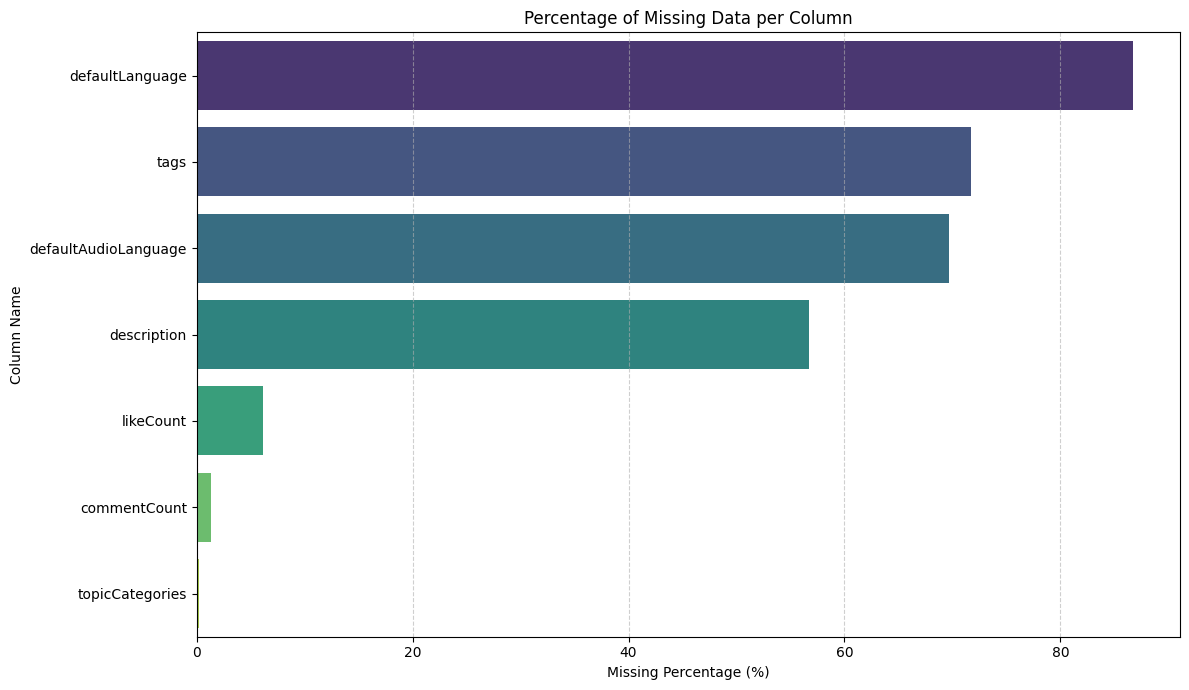

In [15]:
# Calculate the percentage of missing data for each column
missing_data = df.isnull().sum() / len(df) * 100

# Create a DataFrame from the missing data percentages
missing_data_df = pd.DataFrame({'column_name': missing_data.index, 'missing_percentage': missing_data.values})

# Filter out columns with no missing data (optional, but makes the plot cleaner)
missing_data_df = missing_data_df[missing_data_df['missing_percentage'] > 0].sort_values(by='missing_percentage', ascending=False)

# Create a bar plot of missing data percentages
plt.figure(figsize=(12, 7))
sns.barplot(x='missing_percentage', y='column_name', data=missing_data_df, palette='viridis')
plt.title('Percentage of Missing Data per Column')
plt.xlabel('Missing Percentage (%)')
plt.ylabel('Column Name')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Dropping `defaultLanguage` and `defaultAudioLanguage` columns as they have many missing entries and are not the main factors to determine trends.

In [16]:
# Drop the 'defaultLanguage' and 'defaultAudioLanguage' columns
columns_to_drop = ['defaultLanguage', 'defaultAudioLanguage']
df = df.drop(columns=columns_to_drop)

# Display the first few rows and the info to confirm the columns are dropped
display(df.head())
display(df.info())

videoId                publishedAt  channelId  \
1    30556  2023-10-27 19:32:16+00:00      46650   
2    51771  2024-09-28 01:23:22+00:00      14346   
3    45298  2023-07-13 15:19:28+00:00      50139   
4    43611  2023-04-29 18:47:37+00:00       8143   
5    32398  2021-10-06 01:28:59+00:00      39642   

                                               title description  \
1  Get ready for the Magic💚💜🤍💝✨ #hydration #glowi...         NaN   
2  #trending #makeup #beautymakeup #yslbeauty #lu...         NaN   
3                              #shortvedio #balayage         NaN   
4  Full Face of Merit Beauty 🤎 featuring new Flus...         NaN   
5  body lotion fit tuber 👈|| girls body lotion 👆|...         NaN   

                                                tags  \
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   
5  ['body lotion fit tuber', 'fit tuber body loti...   

                                             allTags  \
1   #hydration #glowingskin #nomakeuplook #skincare    
2   #trending #makeup #beautymakeup #yslbeauty #l...   
3                             #shortvedio #balayage    
4                   #merit #sephora #makeuptutorial    
5  ['body lotion fit tuber', 'fit tuber body loti...   

                                       allTags_array  \
1   [hydration, glowingskin, nomakeuplook, skincare]   
2  [trending, makeup, beautymakeup, yslbeauty, lu...   
3                             [shortvedio, balayage]   
4                   [merit, sephora, makeuptutorial]   
5  [body lotion fit tuber, fit tuber body lotion,...   

   contentDuration(seconds)  viewCount  likeCount  commentCount  \
1                        45      257.0        7.0           0.0   
2                        19      164.0        4.0           2.0   
3                        14     1207.0       20.0           0.0   
4                        56     8647.0      268.0           7.0   
5                        17     1366.0       15.0           0.0   

                                     topicCategories  \
1  ['https://en.wikipedia.org/wiki/Lifestyle_(soc...   
2  ['https://en.wikipedia.org/wiki/Lifestyle_(soc...   
3  ['https://en.wikipedia.org/wiki/Lifestyle_(soc...   
4  ['https://en.wikipedia.org/wiki/Lifestyle_(soc...   
5  ['https://en.wikipedia.org/wiki/Lifestyle_(soc...   

                              topicCategories_array  
1  [Lifestyle_(sociology), Physical_attractiveness]  
2  [Lifestyle_(sociology), Physical_attractiveness]  
3  [Lifestyle_(sociology), Physical_attractiveness]  
4  [Lifestyle_(sociology), Physical_attractiveness]  
5  [Lifestyle_(sociology), Physical_attractiveness]

<class 'pandas.core.frame.DataFrame'>
Index: 73778 entries, 1 to 92758
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   videoId                   73778 non-null  int64  
 1   publishedAt               73778 non-null  object 
 2   channelId                 73778 non-null  int64  
 3   title                     73778 non-null  object 
 4   description               31912 non-null  object 
 5   tags                      20889 non-null  object 
 6   allTags                   73778 non-null  object 
 7   allTags_array             73778 non-null  object 
 8   contentDuration(seconds)  73778 non-null  int64  
 9   viewCount                 73778 non-null  float64
 10  likeCount                 69243 non-null  float64
 11  commentCount              72764 non-null  float64
 12  topicCategories           73611 non-null  object 
 13  topicCategories_array     73778 non-null  object 
dtypes: float64(

None

**Correlation between "viewCount" and "likeCount"**

It is observed that there is a positive correlation between viewCount and likeCount. As the view count increases, the like count also increases, hich indicates more views typically lead to more opportunities for likes.

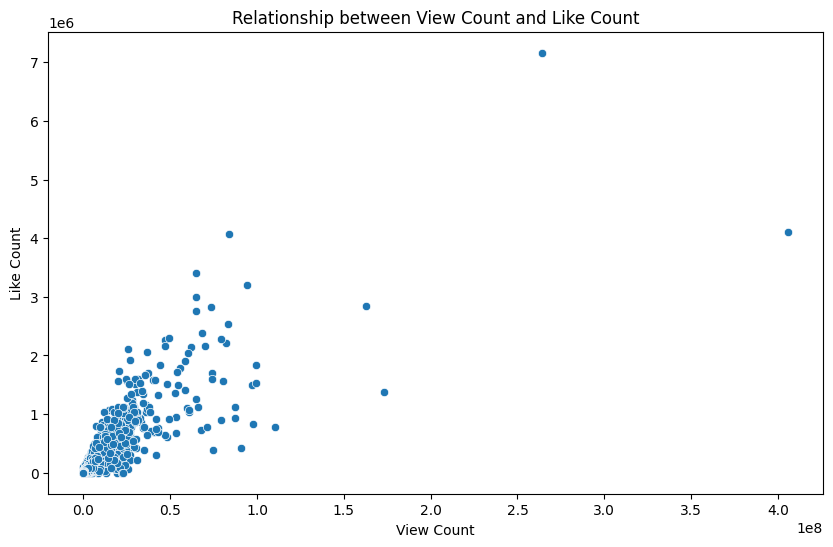

In [17]:
# Explore the relationship between 'likeCount' and 'viewCount'
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='viewCount', y='likeCount')
plt.title('Relationship between View Count and Like Count')
plt.xlabel('View Count')
plt.ylabel('Like Count')
plt.show()

**Distribution of 'viewCount', 'likeCount' and 'commentCount'**

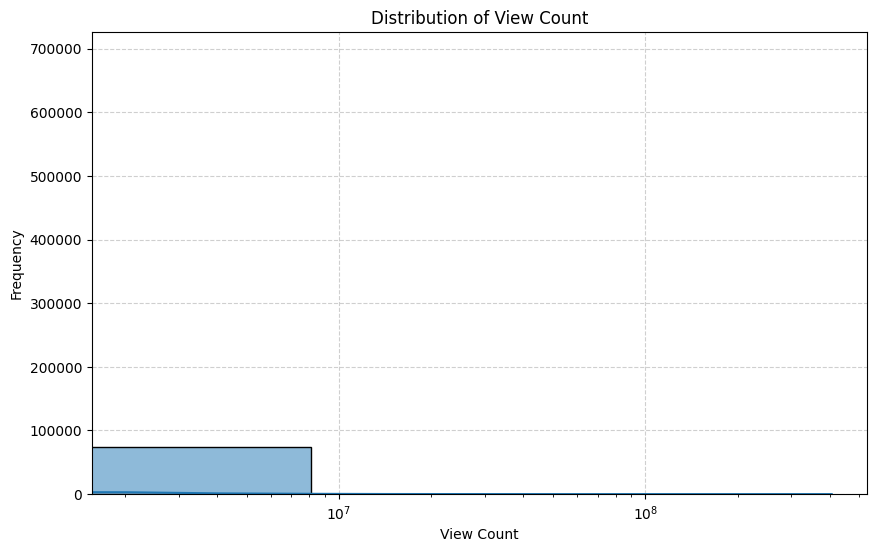

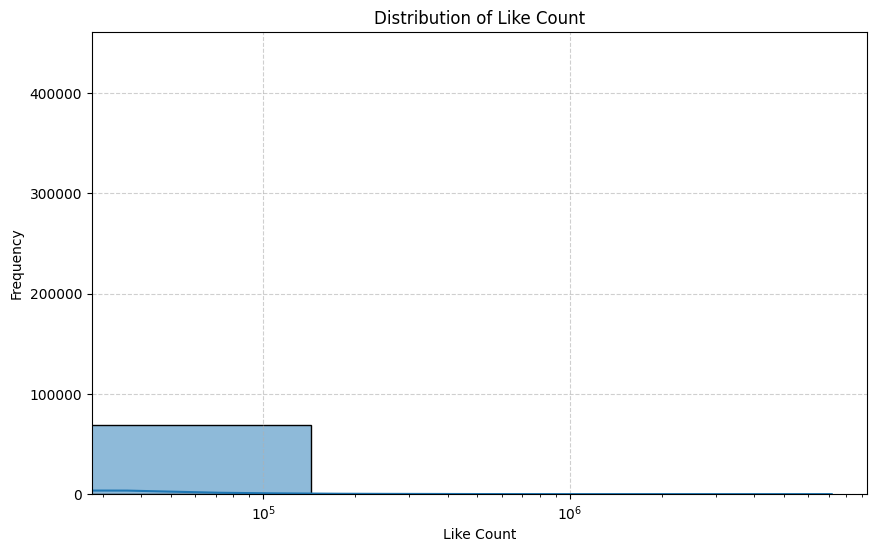

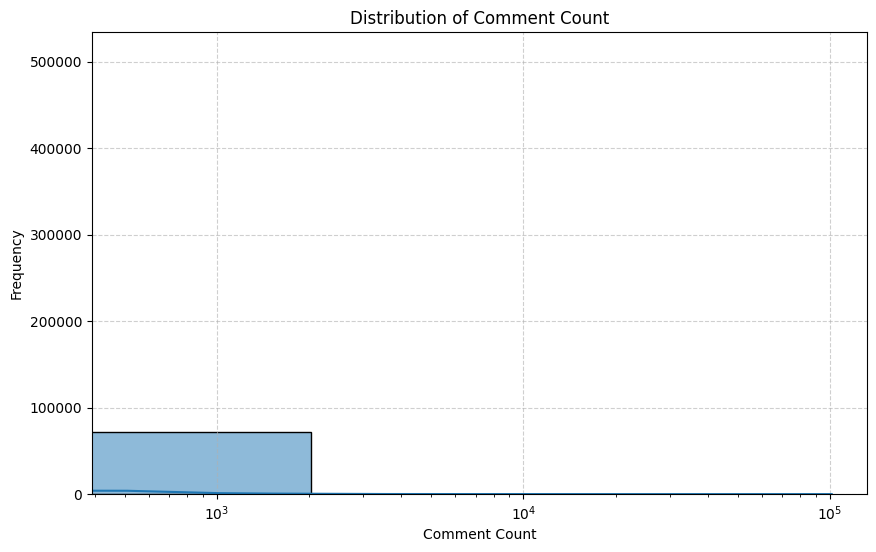

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution plot for View Count
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='viewCount', kde=True, bins=50)
plt.title('Distribution of View Count')
plt.xlabel('View Count')
plt.ylabel('Frequency')
plt.xscale('log') # Use log scale due to potential skewness
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Distribution plot for Like Count
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='likeCount', kde=True, bins=50)
plt.title('Distribution of Like Count')
plt.xlabel('Like Count')
plt.ylabel('Frequency')
plt.xscale('log') # Use log scale due to potential skewness
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Distribution plot for Comment Count
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='commentCount', kde=True, bins=50)
plt.title('Distribution of Comment Count')
plt.xlabel('Comment Count')
plt.ylabel('Frequency')
plt.xscale('log') # Use log scale due to potential skewness
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Box plot for 'viewCount' 'likeCount' and 'commentCount'.

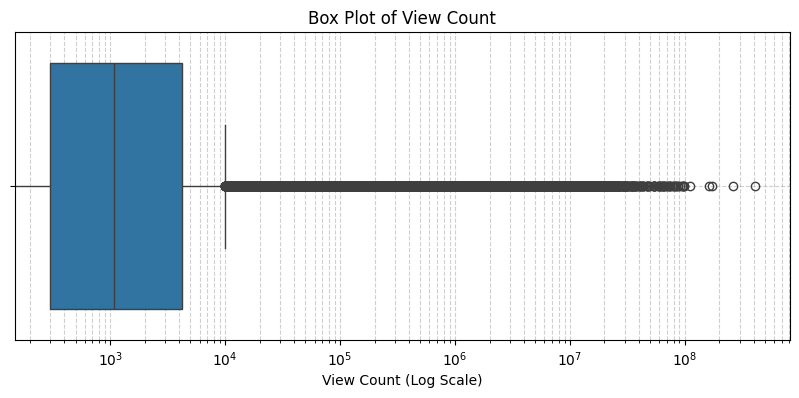

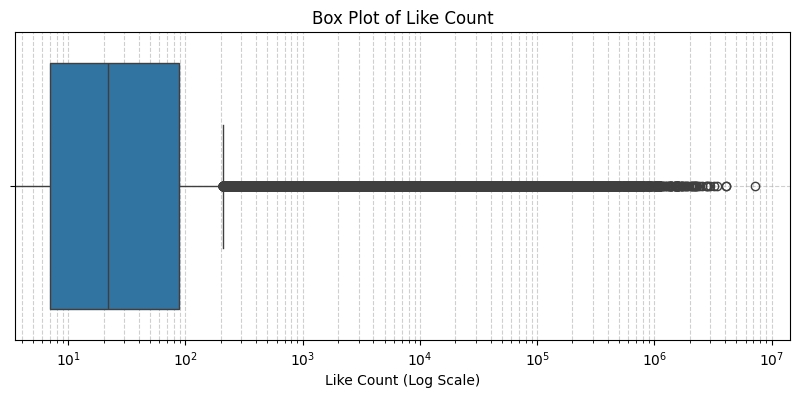

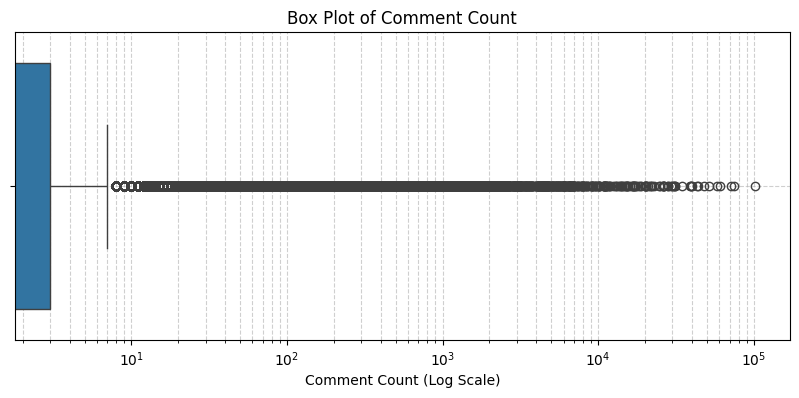

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box plot for View Count
plt.figure(figsize=(10, 4)) # Adjust figure size for horizontal plot
sns.boxplot(data=df, x='viewCount') # Map to x-axis
plt.title('Box Plot of View Count')
plt.xlabel('View Count (Log Scale)') # Change label to xlabel
plt.xscale('log') # Use log scale for x-axis
plt.grid(True, which='both', linestyle='--', alpha=0.6)
plt.show()

# Box plot for Like Count
plt.figure(figsize=(10, 4)) # Adjust figure size
sns.boxplot(data=df, x='likeCount') # Map to x-axis
plt.title('Box Plot of Like Count')
plt.xlabel('Like Count (Log Scale)') # Change label
plt.xscale('log') # Use log scale for x-axis
plt.grid(True, which='both', linestyle='--', alpha=0.6)
plt.show()

# Box plot for Comment Count
plt.figure(figsize=(10, 4)) # Adjust figure size
sns.boxplot(data=df, x='commentCount') # Map to x-axis
plt.title('Box Plot of Comment Count')
plt.xlabel('Comment Count (Log Scale)') # Change label
plt.xscale('log') # Use log scale for x-axis
plt.grid(True, which='both', linestyle='--', alpha=0.6)
plt.show()

In [20]:
# Select the target columns
target_columns = ['viewCount', 'likeCount', 'commentCount']

# Calculate Q1, Q3, IQR, and outlier bounds for each column
outlier_info = {}
for col in target_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_info[col] = {
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound
    }

# Display the calculated outlier information
for col, info in outlier_info.items():
    print(f"Outlier information for '{col}':")
    for key, value in info.items():
        print(f"  {key}: {value}")
    print("-" * 30)

Outlier information for 'viewCount':
  Q1: 300.0
  Q3: 4205.0
  IQR: 3905.0
  Lower Bound: -5557.5
  Upper Bound: 10062.5
------------------------------
Outlier information for 'likeCount':
  Q1: 7.0
  Q3: 88.0
  IQR: 81.0
  Lower Bound: -114.5
  Upper Bound: 209.5
------------------------------
Outlier information for 'commentCount':
  Q1: 0.0
  Q3: 3.0
  IQR: 3.0
  Lower Bound: -4.5
  Upper Bound: 7.5
------------------------------


**Relationship between Content Duration with views/likes**


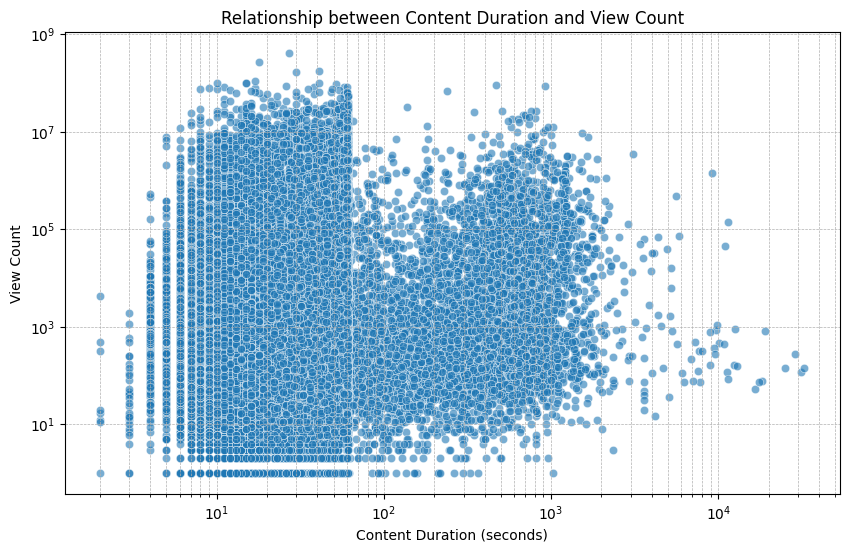

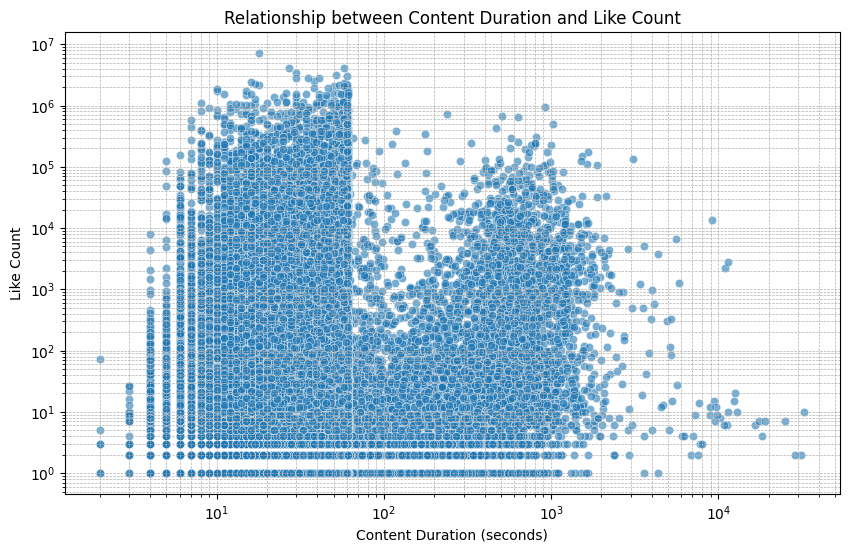

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for Content Duration vs View Count
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='contentDuration(seconds)', y='viewCount', alpha=0.6)
plt.title('Relationship between Content Duration and View Count')
plt.xlabel('Content Duration (seconds)')
plt.ylabel('View Count')
plt.xscale('log') # Use log scale for x-axis if duration varies widely
plt.yscale('log') # Use log scale for y-axis if view counts vary widely
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

# Scatter plot for Content Duration vs Like Count
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='contentDuration(seconds)', y='likeCount', alpha=0.6)
plt.title('Relationship between Content Duration and Like Count')
plt.xlabel('Content Duration (seconds)')
plt.ylabel('Like Count')
plt.xscale('log') # Use log scale for x-axis if duration varies widely
plt.yscale('log') # Use log scale for y-axis if like counts vary widely
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

The scatter plots reveal that a large number of videos are concentrated at shorter durations. While there is a wide range of view and like counts across all video lengths, there is no strong linear correlation between content duration and engagement. High engagement is observed for videos of various lengths, suggesting that factors other than just duration significantly influence views and likes. Shorter content is more prevalent in the dataset, but successful videos exist across a spectrum of durations.

##Hashtag Exploration

To explore the keywords in `allTags`.

In [22]:
from collections import Counter
import itertools

# Flatten the list of lists in 'allTags_array' and count the occurrences of each hashtag
all_hashtags = list(itertools.chain.from_iterable(df['allTags_array'].dropna()))
hashtag_counts = Counter(all_hashtags)

# Convert to a DataFrame for easier display
hashtag_counts_df = pd.DataFrame.from_dict(hashtag_counts, orient='index', columns=['count']).sort_values(by='count', ascending=False)

# Display the top 20 most frequent hashtags
display(hashtag_counts_df.head(20))

count
shorts              32100
makeup              19860
beauty              10823
hair                 8828
youtubeshorts        8544
trending             8405
viral                8079
skincare             7812
hairstyle            6998
makeuptutorial       5939
39                   4469
fashion              4136
haircare             3923
ytshorts             3586
lipstick             3467
short                3429
viralvideo           3413
yoga                 3400
hairtransformation   3109
shortvideo           3082

In [23]:
print("🔢 Number of unique hashtags:", len(hashtag_counts))
print("🔢 Number of unique hashtags:", hashtag_counts_df.shape[0])
print("🧷 Sample unique hashtags:", list(hashtag_counts.keys())[:10])

🔢 Number of unique hashtags: 191633
🔢 Number of unique hashtags: 191633
🧷 Sample unique hashtags: ['hydration', 'glowingskin', 'nomakeuplook', 'skincare', 'trending', 'makeup', 'beautymakeup', 'yslbeauty', 'luxury', 'latina']


**Subtask:** Examine the list of most frequent hashtags to identify potential typos or variations.

**Reasoning**:
Inspect the top entries of `hashtag_counts_df` to identify potential typos or variations.

In [24]:
display(hashtag_counts_df.head(50))

count
shorts              32100
makeup              19860
beauty              10823
hair                 8828
youtubeshorts        8544
trending             8405
viral                8079
skincare             7812
hairstyle            6998
makeuptutorial       5939
39                   4469
fashion              4136
haircare             3923
ytshorts             3586
lipstick             3467
short                3429
viralvideo           3413
yoga                 3400
hairtransformation   3109
shortvideo           3082
fyp                  3030
grwm                 3015
youtube              2924
haircut              2796
Shorts               2773
facelift             2638
glowingskin          2495
makeupartist         2436
shortsfeed           2404
haircolor            2347
antiaging            2267
highlights           2243
reels                2229
beautiful            2164
love                 2158
hairstyles           2157
faceyoga             2152
balayage             2003
skincareroutine      2001
wrinkles             1980
shortsvideo          1971
beautytips           1798
trendingshorts       1784
glowup               1762
tiktok               1697
subscribe            1624
viralshorts          1609
makeuplook           1609
makeupshorts         1599
blush                1590

In [25]:
import pandas as pd
import re

def strip_leading_symbols(tag_list):
    """
    Removes leading non-alphanumeric characters from each tag in a list.
    Keeps list structure intact. Skips non-list entries.
    """
    if not isinstance(tag_list, list):
        return tag_list
    cleaned_tags = []
    for tag in tag_list:
        # Remove leading symbols like #, ., !, etc.
        cleaned = re.sub(r'^[^a-zA-Z0-9]+', '', str(tag))
        cleaned_tags.append(cleaned)
    return cleaned_tags

# Apply this BEFORE mapping
df['allTags_array'] = df['allTags_array'].apply(strip_leading_symbols)
display(df[['allTags_array']].head())

allTags_array
1   [hydration, glowingskin, nomakeuplook, skincare]
2  [trending, makeup, beautymakeup, yslbeauty, lu...
3                             [shortvedio, balayage]
4                   [merit, sephora, makeuptutorial]
5  [body lotion fit tuber, fit tuber body lotion,...

Implement the manual mapping for the most frequent hashtag variations identified in the previous step.

In [26]:
import re
import pandas as pd

# Manual mapping dictionary for common hashtag variations
hashtag_mapping = {
    'youtubeshorts': 'shorts',
    'youtubeshort': 'shorts',
    'ytshorts': 'shorts',
    'ytshort': 'shorts',
    'youtube shorts': 'shorts',
    'short': 'shorts',
    'shortvideo': 'shorts',
    'shorts': 'shorts',
    'shortsvideo': 'shorts',
    'trendingshorts': 'shorts',
    'shortsfeed': 'shorts',
    'viralshorts': 'shorts',
    'viralviedoshorts': 'shorts',
    'shortsyoutube': 'shorts',
    'viralshort': 'shorts',
    'shortsforyou': 'shorts',
    'shortsviral': 'shorts',
    'ashortaday': 'shorts',
    'shortvedio': 'shorts',
    'makeupshorts': 'makeup',
    'makeuptutorial': 'makeup',
    'makeup tutorial': 'makeup',
    'makeupartist': 'makeup',
    'makeup artist': 'makeup',
    'makeuplook': 'makeup',
    'makeuplover': 'makeup',
    'makeup': 'makeup',
    'makeuphacks': 'makeup',
    'makeuptips': 'makeup',
    'makeuptransformation': 'makeup',
    'makeup transformation': 'makeup',
    'makeupideas': 'makeup',
    'makeuplooks': 'makeup',
    'makeup looks': 'makeup',
    'makeup look': 'makeup',
    'makeupproducts': 'makeup',
    'bridalmakeup': 'makeup',
    'makeupaddict': 'makeup',
    'makeupvideo': 'makeup',
    'beautymakeup': 'makeup',
    'beautytips': 'beauty',
    'beautyproducts': 'beauty',
    'beauty': 'beauty',
    'hairstyle': 'hair',
    'haircare': 'hair',
    'hairtransformation': 'hair',
    'hair transformation': 'hair',
    'haircut': 'hair',
    'haircolor': 'hair',
    'hair color': 'hair',
    'hairgrowth': 'hair',
    'hairstyles': 'hair',
    'hairstyling': 'hair',
    'hairstylist': 'hair',
    'naturalhair': 'hair',
    'hairtutorial': 'hair',
    'hair care': 'hair',
    'hairgoals': 'hair',
    'hairtreatment': 'hair',
    'haircolour': 'hair',
    'hair': 'hair',
    'hairfashion': 'hair',
    'healthyhair': 'hair',
    'hairlove': 'hair',
    'curlyhair': 'hair',
    'longhair': 'hair',
    'blondehair': 'hair',
    'beautiful': 'beauty',
    'beautyhacks': 'beauty',
    'glowingskin': 'skincare',
    'skin care': 'skincare',
    'skincare': 'skincare',
    'skincareroutine': 'skincare',
    'skincare routine': 'skincare',
    'skincaretips': 'skincare',
    'antiaging': 'skincare',
    'faceyoga': 'skincare',
    'wrinkles': 'skincare',
    'facelift': 'skincare',
    'skincareproducts': 'skincare',
    'skincaregoals': 'skincare',
    'skin': 'skincare',
    'glowup': 'skincare',
    'viralvideo': 'viral',
    'trendingvideo': 'trending',
    'fashiontips': 'fashion',
    'lipsticktutorial': 'lipstick',
    'yogapractice': 'yoga',
    'yogalife': 'yoga',
    'yogachallenge': 'yoga',
    'nailart': 'nails',
    'naildesign': 'nails',
    'nailsart': 'nails',
    'nail art': 'nails',
    'nails art': 'nails',
    'nail design': 'nails',
    'nail designs': 'nails',
    'nails designs': 'nails',
    'nail': 'nails',
    'nailpolish': 'nails',
    'nailtutorial': 'nails',
    'nailsofinstagram': 'nails',
    'nail videos': 'nails',
    'nail video': 'nails',
    'yt': 'youtube',
    'youtuber': 'youtube',
    'song': 'music',
    'grwm': 'grwm',
    'fashion': 'fashion',
    # Add more mappings as needed
}

# Step 2: Function to clean symbols, map, and deduplicate hashtags
def clean_and_map_hashtags(hashtags_list):
    if not isinstance(hashtags_list, list):
        return hashtags_list  # Return as-is if not a list (e.g., NaN)

    cleaned_tags = []
    for tag in hashtags_list:
        # Remove leading and trailing non-alphanumeric characters
        tag_cleaned = re.sub(r'^[^a-zA-Z0-9]+|[^a-zA-Z0-9]+$', '', tag)

        # Convert to lowercase
        tag_lower = tag_cleaned.lower()

        # Apply manual mapping
        mapped_tag = hashtag_mapping.get(tag_lower, tag_lower)

        cleaned_tags.append(mapped_tag)

    # Deduplicate while preserving order
    deduplicated_tags = list(dict.fromkeys(cleaned_tags))

    return deduplicated_tags

# Step 3: Apply the cleaning + mapping function to the DataFrame
df['allTags_mapped'] = df['allTags_array'].apply(clean_and_map_hashtags)

# Step 4: Display original and cleaned tags for comparison
display(df[['allTags_array', 'allTags_mapped']].head())

allTags_array  \
1   [hydration, glowingskin, nomakeuplook, skincare]   
2  [trending, makeup, beautymakeup, yslbeauty, lu...   
3                             [shortvedio, balayage]   
4                   [merit, sephora, makeuptutorial]   
5  [body lotion fit tuber, fit tuber body lotion,...   

                                      allTags_mapped  
1                [hydration, skincare, nomakeuplook]  
2  [trending, makeup, yslbeauty, luxury, latina, ...  
3                                 [shorts, balayage]  
4                           [merit, sephora, makeup]  
5  [body lotion fit tuber, fit tuber body lotion,...

**Implement Cleaning**

Apply the chosen cleaning strategy to the `allTags_array` column to standardize hashtags.

**Reasoning**:
Implement the string similarity part of the cleaning strategy using a function and apply it to the hashtags not covered by manual mapping.

In [27]:
import time
import itertools
from nltk.metrics import distance

# Define a threshold for Levenshtein distance
LEVENSHTEIN_THRESHOLD = 2

# Precompute lowercase manual mapping for faster lookup
manual_mapping_lower = {
    key.lower(): value for key, value in hashtag_mapping.items()
}

def find_similar_hashtags(hashtag, candidates, threshold=LEVENSHTEIN_THRESHOLD):
    """Finds similar hashtags based on Levenshtein distance."""
    return [
        other for other in candidates
        if other != hashtag and distance.edit_distance(hashtag, other) <= threshold
    ]

# Flatten and deduplicate mapped hashtags
all_mapped_hashtags = list(itertools.chain.from_iterable(df['allTags_mapped'].dropna()))
unique_mapped_hashtags = set(all_mapped_hashtags)

# Identify unmapped hashtags (case-insensitive)
unique_unmapped_hashtags = [
    tag for tag in unique_mapped_hashtags
    if tag.lower() not in manual_mapping_lower
]

print(f"Number of unique unmapped hashtags: {len(unique_unmapped_hashtags)}")

# Limit processing for performance
subset_to_process = unique_unmapped_hashtags[:1000]
print(f"Processing a subset of {len(subset_to_process)} unique unmapped hashtags for similarity.")

similarity_mapping = {}
processed = set()

start_time = time.time()

for hashtag in subset_to_process:
    if hashtag not in processed:
        similar = find_similar_hashtags(hashtag, subset_to_process)
        for tag in similar:
            if tag not in processed:
                similarity_mapping[tag] = hashtag
                processed.add(tag)
        processed.add(hashtag)

end_time = time.time()
print(f"Similarity grouping completed in {end_time - start_time:.2f} seconds.")
print(f"Number of similarity groupings created: {len(similarity_mapping)}")

# Apply both manual and similarity mapping
def apply_all_mapping(tag_list):
    if not isinstance(tag_list, list):
        return tag_list
    mapped = []
    for tag in tag_list:
        lower = tag.lower()
        if lower in manual_mapping_lower:
            mapped.append(manual_mapping_lower[lower])
        else:
            mapped.append(similarity_mapping.get(tag, tag))
    return mapped

# Apply to mapped column
df['allTags_cleaned'] = df['allTags_mapped'].apply(apply_all_mapping)

# Display comparison
display(df[['allTags_array', 'allTags_mapped', 'allTags_cleaned']].head())

Number of unique unmapped hashtags: 169131
Processing a subset of 1000 unique unmapped hashtags for similarity.
Similarity grouping completed in 222.33 seconds.
Number of similarity groupings created: 7


allTags_array  \
1   [hydration, glowingskin, nomakeuplook, skincare]   
2  [trending, makeup, beautymakeup, yslbeauty, lu...   
3                             [shortvedio, balayage]   
4                   [merit, sephora, makeuptutorial]   
5  [body lotion fit tuber, fit tuber body lotion,...   

                                      allTags_mapped  \
1                [hydration, skincare, nomakeuplook]   
2  [trending, makeup, yslbeauty, luxury, latina, ...   
3                                 [shorts, balayage]   
4                           [merit, sephora, makeup]   
5  [body lotion fit tuber, fit tuber body lotion,...   

                                     allTags_cleaned  
1                [hydration, skincare, nomakeuplook]  
2  [trending, makeup, yslbeauty, luxury, latina, ...  
3                                 [shorts, balayage]  
4                           [merit, sephora, makeup]  
5  [body lotion fit tuber, fit tuber body lotion,...

In [28]:
def has_duplicates(tag_list):
    return isinstance(tag_list, list) and len(tag_list) != len(set(tag_list))

# Count how many rows still contain duplicates
duplicate_rows = df['allTags_cleaned'].apply(has_duplicates).sum()

print(f"🔍 Rows with duplicate tags in 'allTags_cleaned': {duplicate_rows}")

display(df[['allTags_array', 'allTags_cleaned']].head(30))

🔍 Rows with duplicate tags in 'allTags_cleaned': 0


allTags_array  \
1    [hydration, glowingskin, nomakeuplook, skincare]   
2   [trending, makeup, beautymakeup, yslbeauty, lu...   
3                              [shortvedio, balayage]   
4                    [merit, sephora, makeuptutorial]   
5   [body lotion fit tuber, fit tuber body lotion,...   
6   [bride, bridemakeup, dulhanwalifeeling, brides...   
7     [best, makeup, eyebrows, products, beauty, fyp]   
8    [blackgirlmakeup, makeup, blackgirlmakeupvideos]   
9   [jenny, kpop, skincare, skincaregoals, glowupt...   
11                                             [grwm]   
14                 [makeup, grwmmakeup, fyp, bronzer]   
15  [stay at home mom, mom life, mom vlog, toddler...   
17  [makeup, makeup tutorial, easy makeup, prom ma...   
19  [Anti-aging, Anti-aging massage, Facial massag...   
20  [serum, Whitening serum, 4 in 1 serum, Naicina...   
21  [shorts, skincare, reels, instantglow, facepow...   
22                  [fok, blackgirlmagic, blackqueen]   
23          [beautyparlour, kasturi, haircolor, love]   
24  [hairstylehairstyle, hairstyle, hair, shortvid...   
25  [makeup, makeupartist, mua, highlights, contou...   
26  [highlights, blondehair, haircut, hair, hairst...   
27  [shorts, viral, lawanstigma, pria, beauty, wan...   
28  [haircut, youtube, instagram, reels, hair, hai...   
29     [frizzyhair, dryhair, unrulyhair, nanoplastia]   
30  [makeup, lipstick, makeuptutorial, makeuplook,...   
31           [viral, shorts, ytshorts, youtubeshorts]   
32  [makeupfordarkskin, grwm, girlsnight, girlsnig...   
34                   [bodysplashs, perfumes, perfume]   
35                       [thehairreal, hairextension]   
36  [yt, grwm, ytshorts, shorts, transition, munna...   

                                      allTags_cleaned  
1                 [hydration, skincare, nomakeuplook]  
2   [trending, makeup, yslbeauty, luxury, latina, ...  
3                                  [shorts, balayage]  
4                            [merit, sephora, makeup]  
5   [body lotion fit tuber, fit tuber body lotion,...  
6   [bride, bridemakeup, dulhanwalifeeling, brides...  
7     [best, makeup, eyebrows, products, beauty, fyp]  
8    [blackgirlmakeup, makeup, blackgirlmakeupvideos]  
9   [jenny, kpop, skincare, glowuptips, shorts, je...  
11                                             [grwm]  
14                 [makeup, grwmmakeup, fyp, bronzer]  
15  [stay at home mom, mom life, mom vlog, toddler...  
17  [makeup, easy makeup, prom makeup, tik tok mak...  
19  [anti-aging, anti-aging massage, facial massag...  
20  [serum, whitening serum, 4 in 1 serum, naicina...  
21  [shorts, skincare, reels, instantglow, facepow...  
22                  [fok, blackgirlmagic, blackqueen]  
23               [beautyparlour, kasturi, hair, love]  
24                 [hairstylehairstyle, hair, shorts]  
25  [makeup, mua, highlights, contour, art, eyemak...  
26                                 [highlights, hair]  
27  [shorts, viral, lawanstigma, pria, beauty, wan...  
28  [hair, youtube, instagram, reels, salon, curly...  
29     [frizzyhair, dryhair, unrulyhair, nanoplastia]  
30                                 [makeup, lipstick]  
31                                    [viral, shorts]  
32  [makeupfordarkskin, grwm, girlsnight, girlsnig...  
34                   [bodysplashs, perfumes, perfume]  
35                       [thehairreal, hairextension]  
36  [youtube, grwm, shorts, transition, munnabhai,...

**Recount hashtags**

Flatten the cleaned hashtags, count their occurrences, convert to a DataFrame, sort by count, and display the top 20 to show the impact of cleaning.

In [29]:
# Flatten the list of lists in 'allTags_cleaned' and count the occurrences of each cleaned hashtag
all_cleaned_hashtags = list(itertools.chain.from_iterable(df['allTags_cleaned'].dropna()))
cleaned_hashtag_counts = Counter(all_cleaned_hashtags)

# Convert to a DataFrame for easier display
cleaned_hashtag_counts_df = pd.DataFrame.from_dict(cleaned_hashtag_counts, orient='index', columns=['count']).sort_values(by='count', ascending=False)

# Display the top 20 most frequent cleaned hashtags
display(cleaned_hashtag_counts_df.head(20))

count
shorts      28726
makeup      20314
hair        17890
beauty      11979
skincare    10499
viral        8044
trending     7079
39           4084
fashion      3229
youtube      3088
fyp          3040
grwm         2615
lipstick     2450
highlights   2000
balayage     1796
reels        1779
love         1694
blush        1491
tiktok       1486
eyeliner     1444

/tmp/ipython-input-2685884917.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_15_cleaned_hashtags.index, y=top_15_cleaned_hashtags['count'], palette='viridis')


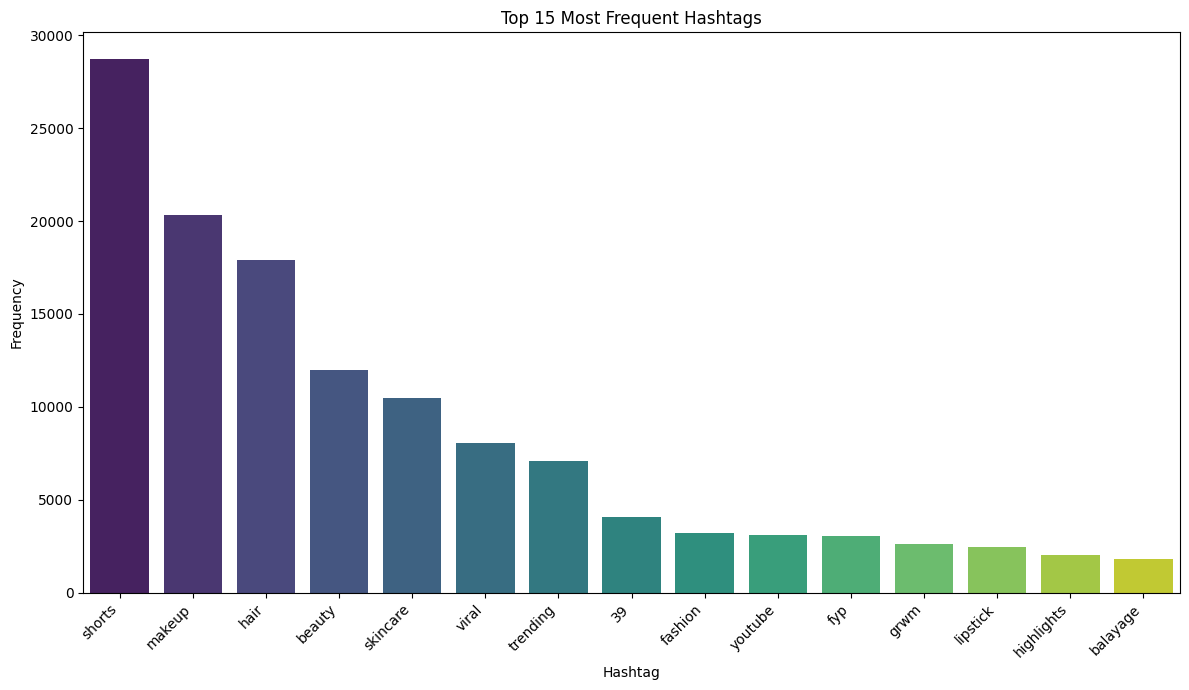

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top 10 most frequent cleaned hashtags
top_15_cleaned_hashtags = cleaned_hashtag_counts_df.head(15)

# Create a bar plot
plt.figure(figsize=(12, 7))
sns.barplot(x=top_15_cleaned_hashtags.index, y=top_15_cleaned_hashtags['count'], palette='viridis')
plt.title('Top 15 Most Frequent Hashtags')
plt.xlabel('Hashtag')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

**Summary**

Data Analysis Key Findings

- Examining the top 50 most frequent hashtags identified common variations and typos for terms like "shorts", "makeup", "beauty", "hair", and "skincare".
- A combined cleaning strategy was implemented: manual mapping for high-frequency variations and string similarity (using Levenshtein distance with a threshold of 2) for less frequent ones.
- Applying the cleaning process resulted in standardized hashtags in a new column, allTags_cleaned.
- After cleaning, the most frequent hashtags were "shorts", "hair", and "makeup".



##Exploring average view and like counts per Hashtag

For each cleaned hashtag, calculate the average view count and average like count for videos containing that hashtag.

In [31]:
# Explode the 'allTags_cleaned' column
exploded_hashtags_df = df.explode('allTags_cleaned')

# Select relevant columns for grouping and aggregation
hashtag_engagement_df = exploded_hashtags_df[['allTags_cleaned', 'viewCount', 'likeCount']]

# Group by the cleaned hashtag and calculate the mean viewCount and likeCount
hashtag_engagement_df = hashtag_engagement_df.groupby('allTags_cleaned')[['viewCount', 'likeCount']].mean().reset_index()

# Display the first few rows of the resulting DataFrame
display(hashtag_engagement_df.head())

allTags_cleaned      viewCount    likeCount
0                  337486.241283  9302.239706
1               0      25.000000     2.000000
2   0 to 10 scale     798.000000    26.000000
3           0-100  141941.500000  5824.500000
4   0-100 glow up    2654.000000    64.000000

Sort the hashtag_engagement_df by viewCount and likeCount in descending order and display the top 10 for each.

In [32]:
# Sort by viewCount in descending order and display the top 10
top_view_hashtags = hashtag_engagement_df.sort_values(by='viewCount', ascending=False).head(10)
print("Top 10 hashtags by average view count:")
display(top_view_hashtags)

# Sort by likeCount in descending order and display the top 10
top_like_hashtags = hashtag_engagement_df.sort_values(by='likeCount', ascending=False).head(10)
print("\nTop 10 hashtags by average like count:")
display(top_like_hashtags)

Top 10 hashtags by average view count:


allTags_cleaned    viewCount  likeCount
106502     miss garg makeup transition  162728811.0  2848082.0
100977                         manbead  110070379.0   785731.0
262                    100millionviews   87426446.0   930413.0
76849                            hsair   87426446.0   930413.0
25574                       bro shaggi   87426446.0   930413.0
166846       worstreviewedmakeupartist   87426446.0   930413.0
57587   glam hair and makeup transform   87426446.0   930413.0
114197                  nikkietutorial   87426446.0   930413.0
116550                             ojo   87426446.0   930413.0
100810                        mama ojo   87426446.0   930413.0


Top 10 hashtags by average like count:


allTags_cleaned    viewCount  likeCount
124455         preityprernaskincare   64574323.0  3412828.0
106502  miss garg makeup transition  162728811.0  2848082.0
133024                   sameperson   82262628.0  2209697.0
148952                superlonghair   70128050.0  2166952.0
40695                     dlhevlasy   70128050.0  2166952.0
103314                   meinehaare   70128050.0  2166952.0
52754               floorlengthhair   35068702.5  2166952.0
64917                     hairbraid   70128050.0  2166952.0
86297                kneelengthhair   70128050.0  2166952.0
128383                 realrapunzel   70128050.0  2166952.0

**Visualize the relationship**

Select the top N most frequent hashtags from cleaned_hashtag_counts_df, filter the hashtag_engagement_df for these hashtags, and then create bar plots for both average view count and average like count, ensuring readability with appropriate labels and rotations.

/tmp/ipython-input-2574462508.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_frequent_engagement_df, x='allTags_cleaned', y='viewCount', palette='viridis')


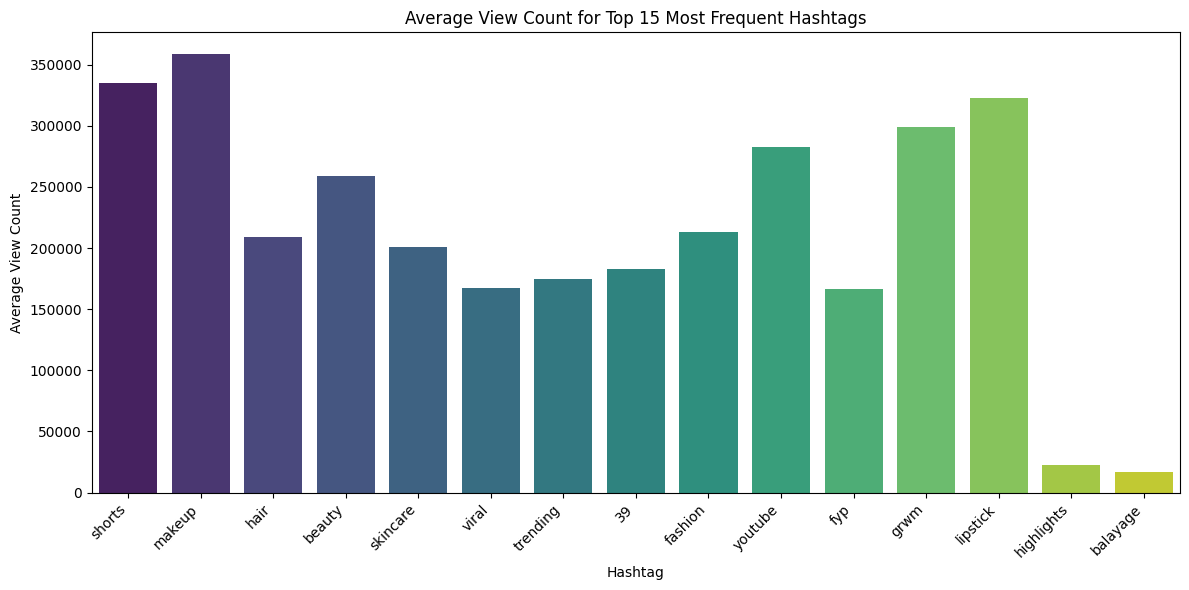

/tmp/ipython-input-2574462508.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_frequent_engagement_df, x='allTags_cleaned', y='likeCount', palette='magma')


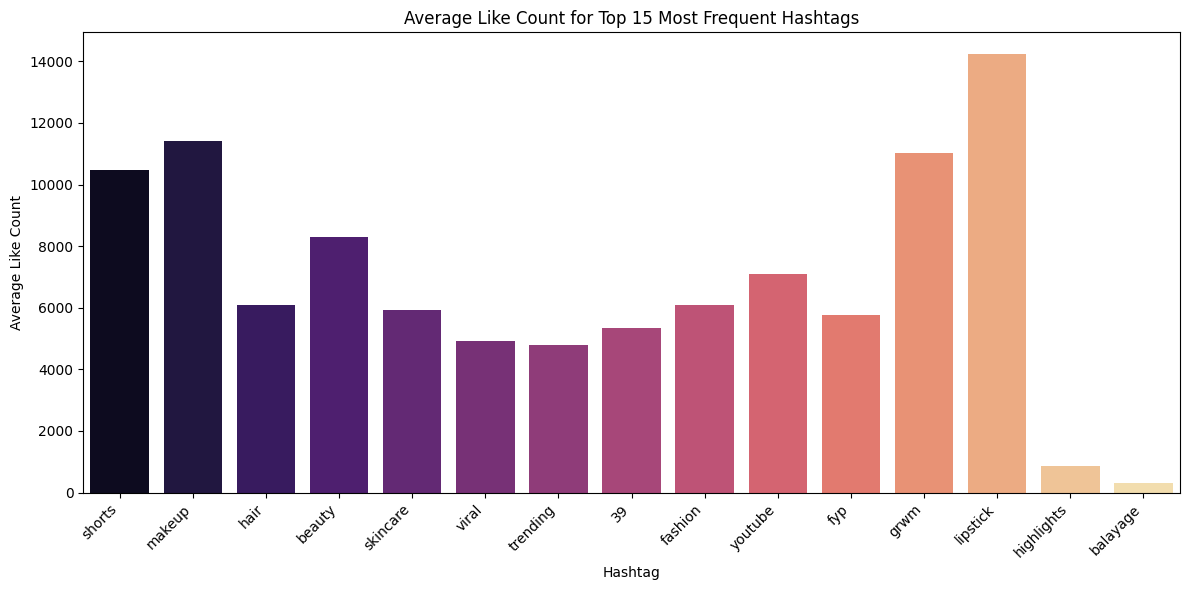

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the top 15 most frequent hashtags
N = 15
top_frequent_hashtags = cleaned_hashtag_counts_df.head(N).index.tolist()

# Filter the hashtag_engagement_df to include only the selected top N hashtags
top_frequent_engagement_df = hashtag_engagement_df[
    hashtag_engagement_df['allTags_cleaned'].isin(top_frequent_hashtags)
]

# Sort the filtered DataFrame by cleaned_hashtag_counts_df to maintain order
top_frequent_engagement_df = top_frequent_engagement_df.set_index('allTags_cleaned').loc[top_frequent_hashtags].reset_index()


# Create a bar plot for average view count
plt.figure(figsize=(12, 6))
sns.barplot(data=top_frequent_engagement_df, x='allTags_cleaned', y='viewCount', palette='viridis')
plt.title(f'Average View Count for Top {N} Most Frequent Hashtags')
plt.xlabel('Hashtag')
plt.ylabel('Average View Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Create a bar plot for average like count
plt.figure(figsize=(12, 6))
sns.barplot(data=top_frequent_engagement_df, x='allTags_cleaned', y='likeCount', palette='magma')
plt.title(f'Average Like Count for Top {N} Most Frequent Hashtags')
plt.xlabel('Hashtag')
plt.ylabel('Average Like Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Summary**

Data Analysis Key Findings

- The average view count and average like count were calculated for each unique cleaned hashtag in the dataset.
- Analyzing the top hashtags by average view count and like count revealed that several hashtags appear in the top 10 for both metrics, suggesting a positive correlation between average views and likes for those specific hashtags.
- Bar plots visualizing the average view and like counts for the top 15 most frequent hashtags show variation in engagement levels across these popular hashtags.

##Datetime features


**Handling 'publishedAt' column**

To focus on trends over longer periods and reduce noise from precise publication times, we will remove the hour, minute, and second information from the `publishedAt` column, keeping only the date. This will allow us to aggregate data and analyze trends on a daily basis.

In [34]:
# Convert the 'publishedAt' column to datetime objects, coercing errors
df['publishedAt'] = pd.to_datetime(df['publishedAt'], errors='coerce')

# Extract only the date part from the datetime objects
df['publishedAt'] = df['publishedAt'].dt.date

# Display the first few rows with the modified column
display(df[['publishedAt']].head())

# Display the data type of the column to verify the change
display(df.info())

publishedAt
1  2023-10-27
2  2024-09-28
3  2023-07-13
4  2023-04-29
5  2021-10-06

<class 'pandas.core.frame.DataFrame'>
Index: 73778 entries, 1 to 92758
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   videoId                   73778 non-null  int64  
 1   publishedAt               73778 non-null  object 
 2   channelId                 73778 non-null  int64  
 3   title                     73778 non-null  object 
 4   description               31912 non-null  object 
 5   tags                      20889 non-null  object 
 6   allTags                   73778 non-null  object 
 7   allTags_array             73778 non-null  object 
 8   contentDuration(seconds)  73778 non-null  int64  
 9   viewCount                 73778 non-null  float64
 10  likeCount                 69243 non-null  float64
 11  commentCount              72764 non-null  float64
 12  topicCategories           73611 non-null  object 
 13  topicCategories_array     73778 non-null  object 
 14  allTags_map

None

In [35]:
# Ensure 'publishedAt' is in datetime format first, coercing errors
df['publishedAt'] = pd.to_datetime(df['publishedAt'], errors='coerce')

# Create a new column 'month_of_year' in 'MMM YYYY' format
df['month_of_year'] = df['publishedAt'].dt.strftime('%b %Y')

# Display the first few rows with the new column
display(df[['publishedAt', 'month_of_year']].head())

# Display the data types to verify the change
display(df.info())

publishedAt month_of_year
1  2023-10-27      Oct 2023
2  2024-09-28      Sep 2024
3  2023-07-13      Jul 2023
4  2023-04-29      Apr 2023
5  2021-10-06      Oct 2021

<class 'pandas.core.frame.DataFrame'>
Index: 73778 entries, 1 to 92758
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   videoId                   73778 non-null  int64         
 1   publishedAt               73778 non-null  datetime64[ns]
 2   channelId                 73778 non-null  int64         
 3   title                     73778 non-null  object        
 4   description               31912 non-null  object        
 5   tags                      20889 non-null  object        
 6   allTags                   73778 non-null  object        
 7   allTags_array             73778 non-null  object        
 8   contentDuration(seconds)  73778 non-null  int64         
 9   viewCount                 73778 non-null  float64       
 10  likeCount                 69243 non-null  float64       
 11  commentCount              72764 non-null  float64       
 12  topicCategories        

None

Adding `week_of_year` column

In [36]:
# Ensure 'publishedAt' is in datetime format first
df['publishedAt'] = pd.to_datetime(df['publishedAt'], errors='coerce')

# Create the 'week_of_year' column
# Using '%U' for week number with Sunday as the first day of the week (00-53)
# Or use '%W' for week number with Monday as the first day of the week (00-53)
# Let's use %U (Sunday as the first day)
df['week_of_year'] = df['publishedAt'].dt.strftime('%U')

# Display the first few rows with the new column
display(df[['publishedAt', 'week_of_year']].head())

# Display the data types to verify the new column
display(df.info())

publishedAt week_of_year
1  2023-10-27           43
2  2024-09-28           38
3  2023-07-13           28
4  2023-04-29           17
5  2021-10-06           40

<class 'pandas.core.frame.DataFrame'>
Index: 73778 entries, 1 to 92758
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   videoId                   73778 non-null  int64         
 1   publishedAt               73778 non-null  datetime64[ns]
 2   channelId                 73778 non-null  int64         
 3   title                     73778 non-null  object        
 4   description               31912 non-null  object        
 5   tags                      20889 non-null  object        
 6   allTags                   73778 non-null  object        
 7   allTags_array             73778 non-null  object        
 8   contentDuration(seconds)  73778 non-null  int64         
 9   viewCount                 73778 non-null  float64       
 10  likeCount                 69243 non-null  float64       
 11  commentCount              72764 non-null  float64       
 12  topicCategories        

None

In [37]:
# Extract year from datetime
df['year'] = df['publishedAt'].dt.year

# Preview the new column
display(df[['publishedAt', 'year', 'week_of_year']].head())

publishedAt  year week_of_year
1  2023-10-27  2023           43
2  2024-09-28  2024           38
3  2023-07-13  2023           28
4  2023-04-29  2023           17
5  2021-10-06  2021           40

Adding `is_weekend` column.


In [38]:
# Ensure 'publishedAt' is in datetime format first
df['publishedAt'] = pd.to_datetime(df['publishedAt'], errors='coerce')

# Create the 'is_weekend' column (True for Saturday and Sunday, False otherwise)
# weekday() returns 0 for Monday and 6 for Sunday
df['is_weekend'] = df['publishedAt'].dt.weekday >= 5

# Display the first few rows with the new column
display(df[['publishedAt', 'is_weekend']].head())

# Display the data types to verify the new column
display(df.info())

publishedAt  is_weekend
1  2023-10-27       False
2  2024-09-28        True
3  2023-07-13       False
4  2023-04-29        True
5  2021-10-06       False

<class 'pandas.core.frame.DataFrame'>
Index: 73778 entries, 1 to 92758
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   videoId                   73778 non-null  int64         
 1   publishedAt               73778 non-null  datetime64[ns]
 2   channelId                 73778 non-null  int64         
 3   title                     73778 non-null  object        
 4   description               31912 non-null  object        
 5   tags                      20889 non-null  object        
 6   allTags                   73778 non-null  object        
 7   allTags_array             73778 non-null  object        
 8   contentDuration(seconds)  73778 non-null  int64         
 9   viewCount                 73778 non-null  float64       
 10  likeCount                 69243 non-null  float64       
 11  commentCount              72764 non-null  float64       
 12  topicCategories        

None

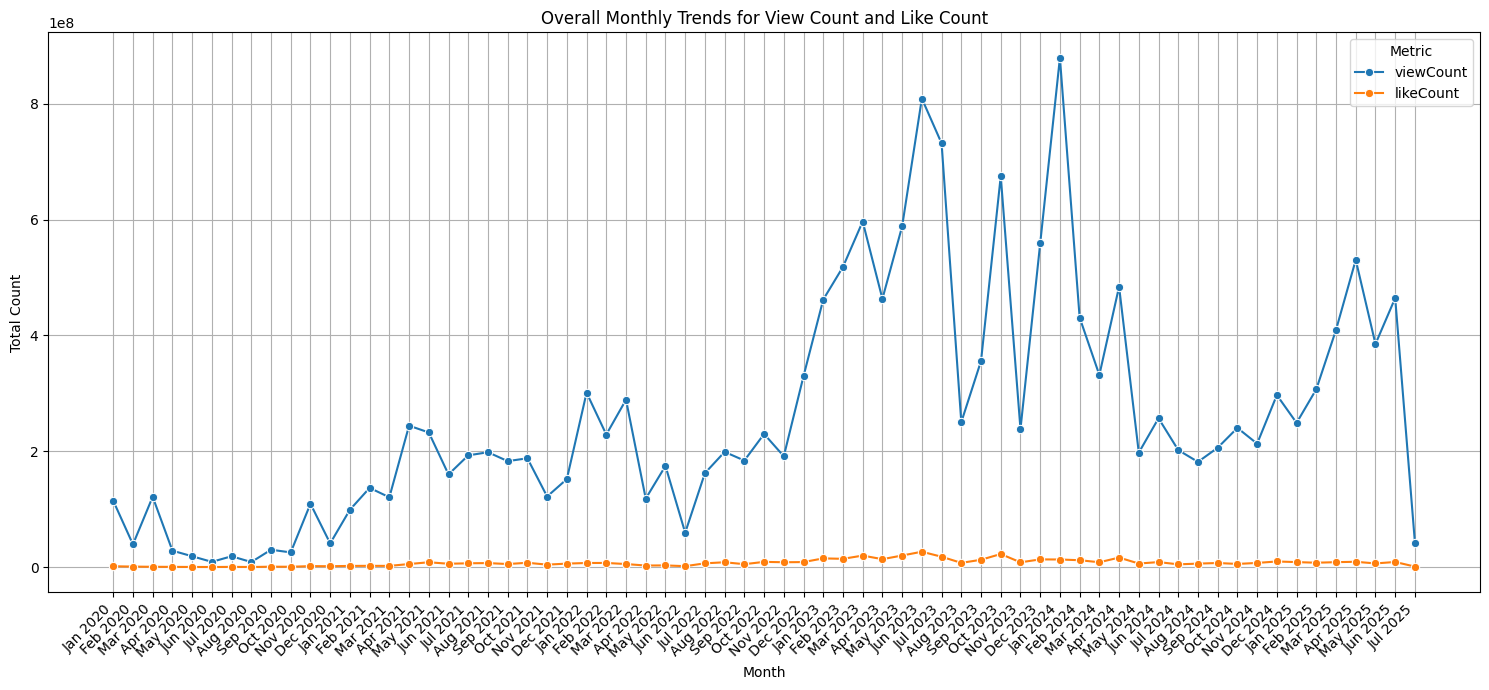

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'publishedAt' is in datetime format and extract month_of_year
df['publishedAt'] = pd.to_datetime(df['publishedAt'], errors='coerce')
df['month_of_year'] = df['publishedAt'].dt.strftime('%b %Y')

# Group by month_of_year and calculate the sum of viewCount and likeCount
monthly_overall_trends = df.groupby('month_of_year')[['viewCount', 'likeCount']].sum().reset_index()

# Ensure the 'month_of_year' column is in datetime format for correct sorting on the plot
monthly_overall_trends['sort_date'] = pd.to_datetime(monthly_overall_trends['month_of_year'], format='%b %Y')

# Sort the DataFrame by the temporary date column
monthly_overall_trends = monthly_overall_trends.sort_values('sort_date')

# Drop the temporary sort column
monthly_overall_trends = monthly_overall_trends.drop(columns=['sort_date'])


# Melt the DataFrame to long format for easier plotting with Seaborn
monthly_overall_trends_melted = monthly_overall_trends.melt(
    id_vars='month_of_year',
    value_vars=['viewCount', 'likeCount'],
    var_name='Metric',
    value_name='Count'
)

# Create the line plot
plt.figure(figsize=(15, 7))
sns.lineplot(data=monthly_overall_trends_melted, x='month_of_year', y='Count', hue='Metric', marker='o')

plt.title('Overall Monthly Trends for View Count and Like Count')
plt.xlabel('Month')
plt.ylabel('Total Count')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for readability
plt.grid(True)
plt.tight_layout()
plt.show()

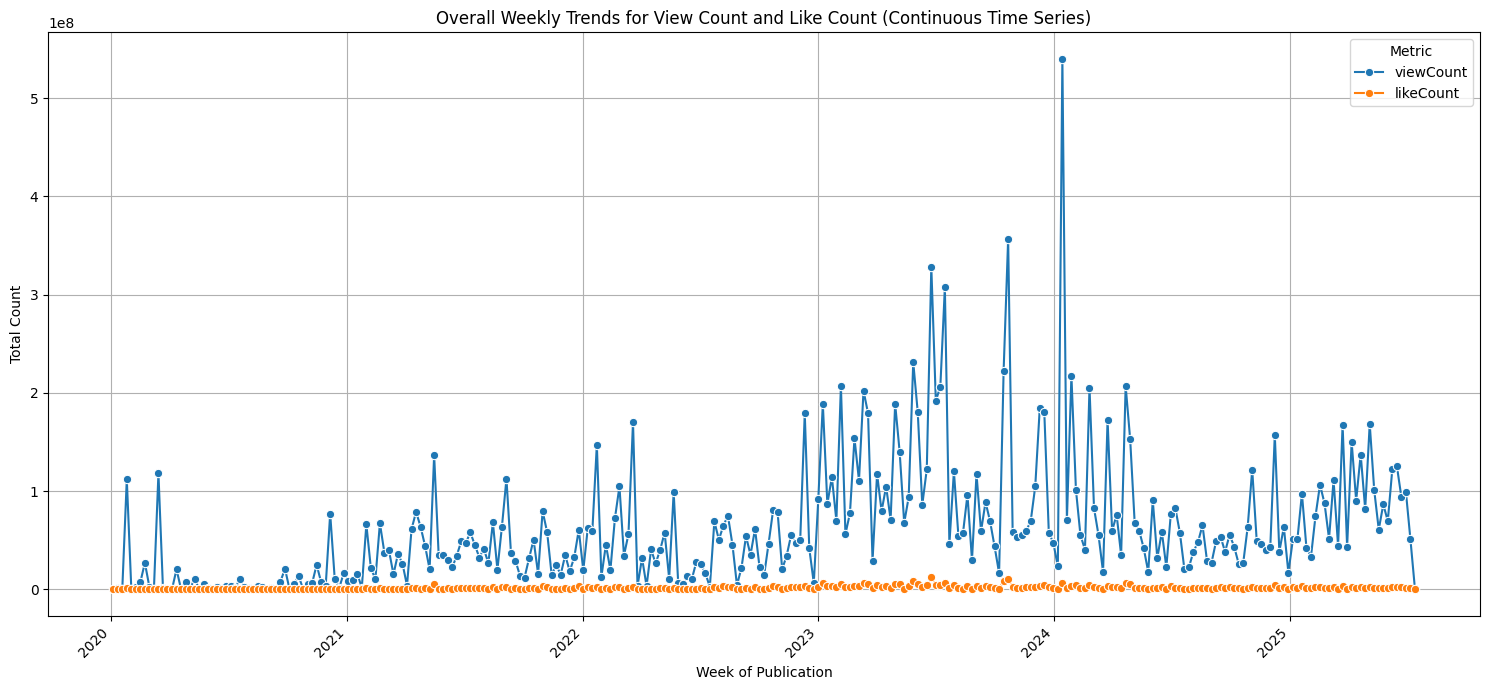

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'publishedAt' is in datetime format and set it as the index
df['publishedAt'] = pd.to_datetime(df['publishedAt'], errors='coerce')
df_indexed_by_date = df.set_index('publishedAt')

# Resample the DataFrame weekly ('W') and calculate the sum of 'viewCount' and 'likeCount'
# 'W' resampling creates weekly periods, typically ending on a Sunday by default
weekly_overall_trends = df_indexed_by_date[['viewCount', 'likeCount']].resample('W').sum().reset_index()

# Melt the DataFrame to long format for easier plotting with Seaborn
weekly_overall_trends_melted = weekly_overall_trends.melt(
    id_vars='publishedAt',
    value_vars=['viewCount', 'likeCount'],
    var_name='Metric',
    value_name='Total Count'
)

# Create the line plot
plt.figure(figsize=(15, 7))
sns.lineplot(data=weekly_overall_trends_melted, x='publishedAt', y='Total Count', hue='Metric', marker='o')

plt.title('Overall Weekly Trends for View Count and Like Count (Continuous Time Series)')
plt.xlabel('Week of Publication')
plt.ylabel('Total Count')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for readability
plt.grid(True)
plt.tight_layout()
plt.show()

Bar graph to compare weekday and weekend engagement.

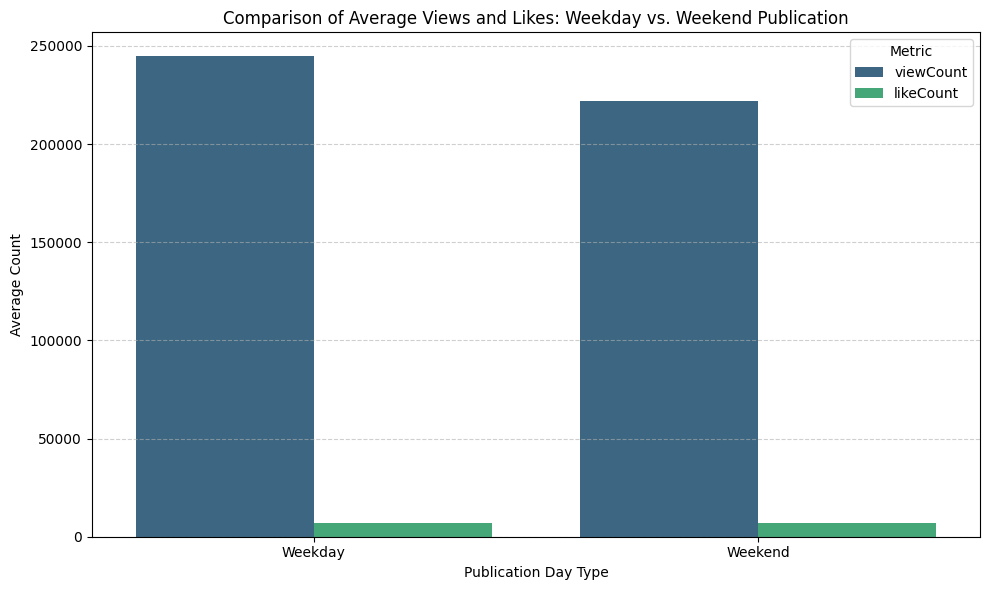

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'is_weekend' and calculate the MEAN of 'viewCount' and 'likeCount'
weekend_engagement = df.groupby('is_weekend')[['viewCount', 'likeCount']].mean().reset_index()

# Rename the boolean values for better readability on the plot
weekend_engagement['is_weekend'] = weekend_engagement['is_weekend'].map({True: 'Weekend', False: 'Weekday'})

# Melt the DataFrame to long format for easier plotting with Seaborn
weekend_engagement_melted = weekend_engagement.melt(
    id_vars='is_weekend',
    value_vars=['viewCount', 'likeCount'],
    var_name='Metric',
    value_name='Average Count' # Change label to Average Count
)

# Create the grouped bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=weekend_engagement_melted, x='is_weekend', y='Average Count', hue='Metric', palette='viridis') # Use Average Count on y-axis

plt.title('Comparison of Average Views and Likes: Weekday vs. Weekend Publication') # Update title
plt.xlabel('Publication Day Type')
plt.ylabel('Average Count') # Update label
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

##Identify trend peaks

**Analyze trends for key hashtags/topics**

Identify key hashtags from the cleaned hashtag counts, filter the DataFrame to include videos with these hashtags, and then resample the data monthly to get the sum of view and like counts for each key hashtag over time, storing the results in a new DataFrame.

In [42]:
# Identify a list of key hashtags to analyze
# Selecting a mix of high-frequency and potentially high-engagement hashtags from previous analysis
key_hashtags = ['yoga', 'hair', 'makeup', 'skincare', 'beauty', 'viral', 'trending', 'shorts', 'lipstick', 'grwm']

# Filter the DataFrame to include only rows where 'allTags_cleaned' contains at least one key hashtag
# Use .apply(lambda x: any(item in x for item in key_hashtags)) to check if any item in the list is in key_hashtags
df_key_hashtags = df[df['allTags_cleaned'].apply(lambda x: any(item in x for item in key_hashtags) if isinstance(x, list) else False)].copy()

# Explode the filtered DataFrame by 'allTags_cleaned' to have one row per hashtag per video
exploded_key_hashtags_df = df_key_hashtags.explode('allTags_cleaned')

# Filter the exploded DataFrame to keep only the rows corresponding to the key hashtags
exploded_key_hashtags_df = exploded_key_hashtags_df[exploded_key_hashtags_df['allTags_cleaned'].isin(key_hashtags)]

# Set 'publishedAt' as the index before resampling
exploded_key_hashtags_df = exploded_key_hashtags_df.set_index('publishedAt')


# Group by the cleaned hashtag and resample monthly, summing viewCount and likeCount
# Using 'ME' instead of 'M' as 'M' is deprecated
hashtag_monthly_trends = exploded_key_hashtags_df.groupby('allTags_cleaned').resample('ME')[['viewCount', 'likeCount']].sum()


# Unstack the result to have hashtags as columns and time as index
# Fill potential NaN values (months with no videos for a hashtag) with 0
hashtag_monthly_trends_unstacked = hashtag_monthly_trends.unstack(level=0).fillna(0)

# Display the first few rows of the resulting DataFrame
display(hashtag_monthly_trends_unstacked.head())

# Display the info of the resulting DataFrame to check the structure
display(hashtag_monthly_trends_unstacked.info())

viewCount                                               \
allTags_cleaned      beauty      grwm        hair  lipstick       makeup   
publishedAt                                                                
2020-01-31       98008014.0    1527.0  87828722.0    2239.0   91349729.0   
2020-02-29       28157328.0  380194.0  26454930.0   26812.0   28576858.0   
2020-03-31        1771112.0    2075.0   2300577.0   46935.0  118306737.0   
2020-04-30         872421.0   20520.0     94583.0   28294.0    5388361.0   
2020-05-31        9707334.0   55117.0   1020908.0  345234.0   12240580.0   

                                                            likeCount          \
allTags_cleaned  shorts    skincare trending viral     yoga    beauty    grwm   
publishedAt                                                                     
2020-01-31          0.0     77001.0    241.0   0.0  58121.0  939633.0    36.0   
2020-02-29          0.0  27363503.0      0.0   0.0      0.0  739701.0  2418.0   
2020-03-31        148.0  90879133.0  61463.0  68.0      0.0   50903.0    20.0   
2020-04-30        596.0     37572.0  22091.0   0.0      0.0   16595.0   728.0   
2020-05-31       2631.0   9030613.0    323.0   0.0    304.0  151771.0  2166.0   

                                                                              \
allTags_cleaned      hair lipstick    makeup shorts  skincare trending viral   
publishedAt                                                                    
2020-01-31       951170.0    134.0  955979.0    0.0    1874.0      9.0   0.0   
2020-02-29       673617.0    337.0  740143.0    0.0  728599.0      0.0   0.0   
2020-03-31        49732.0   1380.0  549869.0    1.0  440921.0      1.0   2.0   
2020-04-30         1263.0    252.0  187872.0   23.0    1636.0    503.0   0.0   
2020-05-31        10282.0   4916.0  213461.0  133.0  131859.0     44.0   0.0   

                         
allTags_cleaned    yoga  
publishedAt              
2020-01-31       1545.0  
2020-02-29          0.0  
2020-03-31          0.0  
2020-04-30          0.0  
2020-05-31         29.0

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 67 entries, 2020-01-31 to 2025-07-31
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   (viewCount, beauty)    67 non-null     float64
 1   (viewCount, grwm)      67 non-null     float64
 2   (viewCount, hair)      67 non-null     float64
 3   (viewCount, lipstick)  67 non-null     float64
 4   (viewCount, makeup)    67 non-null     float64
 5   (viewCount, shorts)    67 non-null     float64
 6   (viewCount, skincare)  67 non-null     float64
 7   (viewCount, trending)  67 non-null     float64
 8   (viewCount, viral)     67 non-null     float64
 9   (viewCount, yoga)      67 non-null     float64
 10  (likeCount, beauty)    67 non-null     float64
 11  (likeCount, grwm)      67 non-null     float64
 12  (likeCount, hair)      67 non-null     float64
 13  (likeCount, lipstick)  67 non-null     float64
 14  (likeCount, makeup)    67 non-null     f

None

Iterate through each hashtag's view and like count time series, find the peak timestamp and value, store them, and display the results.

In [43]:
# Dictionary to store peak information
peak_data = {}

# Get the actual cleaned hashtags from the columns of the unstacked DataFrame
# The columns are a MultiIndex, so we get the second level (level 1) which contains the hashtags
cleaned_hashtags_in_unstacked = hashtag_monthly_trends_unstacked.columns.get_level_values(1).unique()

# Iterate through each cleaned hashtag's view and like count time series
for hashtag in cleaned_hashtags_in_unstacked:
    # Get the view count time series for the current hashtag
    view_ts = hashtag_monthly_trends_unstacked[('viewCount', hashtag)]
    # Find the index (timestamp) of the peak view count
    peak_view_time = view_ts.idxmax()
    # Get the peak view count value
    peak_view_value = view_ts.max()

    # Get the like count time series for the current hashtag
    like_ts = hashtag_monthly_trends_unstacked[('likeCount', hashtag)]
    # Find the index (timestamp) of the peak like count
    peak_like_time = like_ts.idxmax()
    # Get the peak like count value
    peak_like_value = like_ts.max()


    # Store the peak information
    peak_data[hashtag] = {
        'peak_view_time': peak_view_time,
        'peak_view_value': peak_view_value,
        'peak_like_time': peak_like_time,
        'peak_like_value': peak_like_value
    }

# Convert the peak data dictionary to a DataFrame for better display
peak_df = pd.DataFrame.from_dict(peak_data, orient='index')

# Display the identified peaks
print("Identified Peaks in View and Like Counts for Key Hashtags:")
display(peak_df)

Identified Peaks in View and Like Counts for Key Hashtags:


peak_view_time  peak_view_value peak_like_time  peak_like_value
beauty       2023-10-31      507995192.0     2023-10-31       15779272.0
grwm         2023-05-31       98377744.0     2023-03-31        3410234.0
hair         2023-06-30      362600648.0     2023-06-30       11309480.0
lipstick     2023-10-31      105171461.0     2022-08-31        4820403.0
makeup       2023-07-31      455517336.0     2023-03-31       11793971.0
shorts       2024-01-31      720591852.0     2023-06-30       18632894.0
skincare     2023-10-31      279785006.0     2023-10-31        7888681.0
trending     2023-12-31      121961086.0     2023-08-31        2573145.0
viral        2024-12-31       95731594.0     2024-12-31        2666636.0
yoga         2023-12-31       49822244.0     2023-12-31         892055.0

Filter the time series data after the peak and calculate decay metrics for each hashtag and metric.

In [44]:
# Dictionary to store decay metrics
decay_metrics = {}

# Iterate through each hashtag in the peak_df
for hashtag in peak_df.index:
    decay_metrics[hashtag] = {}

    # Get the peak view time for the current hashtag
    peak_view_time = peak_df.loc[hashtag, 'peak_view_time']
    # Get the view count time series for the current hashtag
    view_ts = hashtag_monthly_trends_unstacked[('viewCount', hashtag)]
    # Filter view count time series to include data after the peak
    view_ts_after_peak = view_ts[view_ts.index > peak_view_time]

    # Calculate a simple decay metric for view count: average percentage decrease per month after peak
    # Avoid division by zero or NaN if peak value is zero or data after peak is empty
    if not view_ts_after_peak.empty and peak_df.loc[hashtag, 'peak_view_value'] > 0:
        # Calculate the percentage change from the peak value for each point after the peak
        percentage_decrease_view = (peak_df.loc[hashtag, 'peak_view_value'] - view_ts_after_peak) / peak_df.loc[hashtag, 'peak_view_value'] * 100
        # Calculate the average percentage decrease after the peak
        decay_metrics[hashtag]['avg_monthly_pct_decrease_view'] = percentage_decrease_view.mean()
    else:
        decay_metrics[hashtag]['avg_monthly_pct_decrease_view'] = None


    # Get the peak like time for the current hashtag
    peak_like_time = peak_df.loc[hashtag, 'peak_like_time']
    # Get the like count time series for the current hashtag
    like_ts = hashtag_monthly_trends_unstacked[('likeCount', hashtag)]
    # Filter like count time series to include data after the peak
    like_ts_after_peak = like_ts[like_ts.index > peak_like_time]

    # Calculate a simple decay metric for like count: average percentage decrease per month after peak
    # Avoid division by zero or NaN if peak value is zero or data after peak is empty
    if not like_ts_after_peak.empty and peak_df.loc[hashtag, 'peak_like_value'] > 0:
         # Calculate the percentage change from the peak value for each point after the peak
        percentage_decrease_like = (peak_df.loc[hashtag, 'peak_like_value'] - like_ts_after_peak) / peak_df.loc[hashtag, 'peak_like_value'] * 100
        # Calculate the average percentage decrease after the peak
        decay_metrics[hashtag]['avg_monthly_pct_decrease_like'] = percentage_decrease_like.mean()
    else:
        decay_metrics[hashtag]['avg_monthly_pct_decrease_like'] = None


# Convert the decay metrics dictionary to a DataFrame for better display
decay_df = pd.DataFrame.from_dict(decay_metrics, orient='index')

# Display the calculated decay metrics
print("\nCalculated Decay Metrics (Average Monthly Percentage Decrease After Peak):")
display(decay_df)


Calculated Decay Metrics (Average Monthly Percentage Decrease After Peak):


avg_monthly_pct_decrease_view  avg_monthly_pct_decrease_like
beauty                        90.816064                      92.669652
grwm                          82.993793                      81.652136
hair                          76.802854                      79.192835
lipstick                      93.063849                      86.432712
makeup                        74.337424                      66.476501
shorts                        81.505359                      78.863789
skincare                      83.500895                      83.717195
trending                      78.651760                      76.825686
viral                         61.451640                      75.440769
yoga                          92.976838                      93.927239

Select a few representative hashtags, extract their monthly view and like count time series, get the peak times, and create line plots with vertical lines indicating the peaks for both view and like counts for each selected hashtag to visualize the trends and decay.


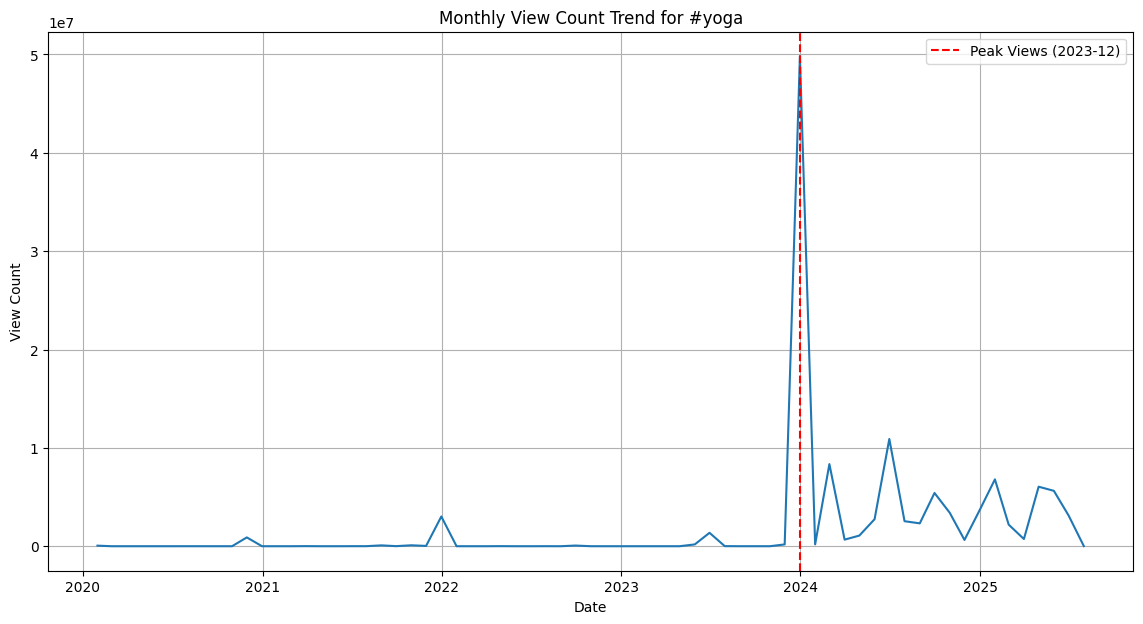

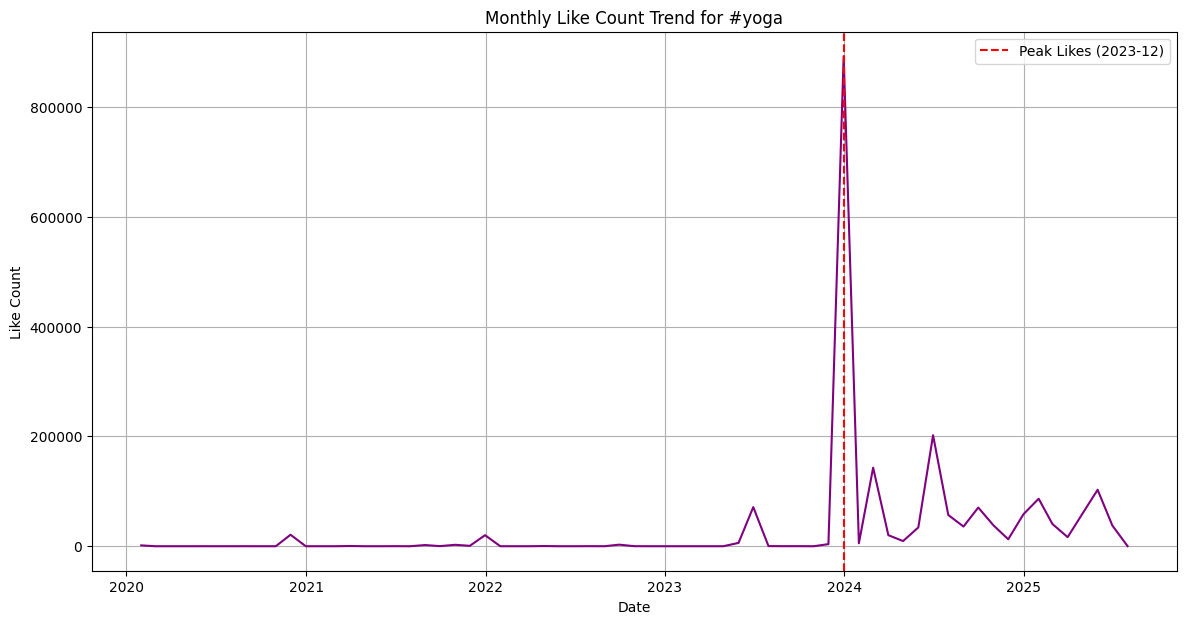

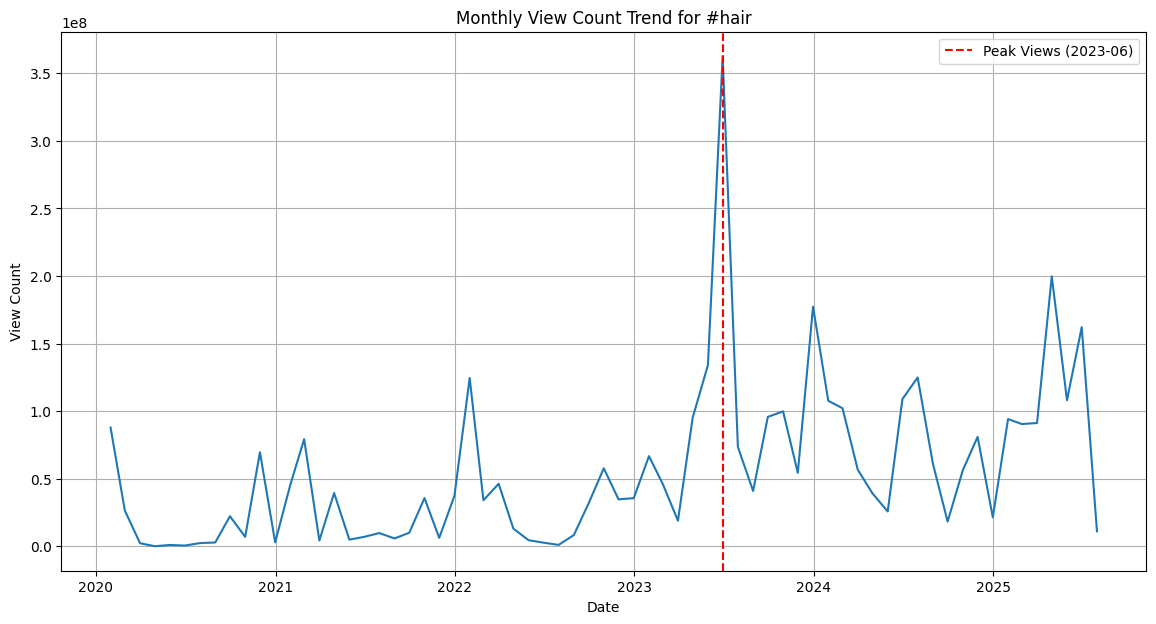

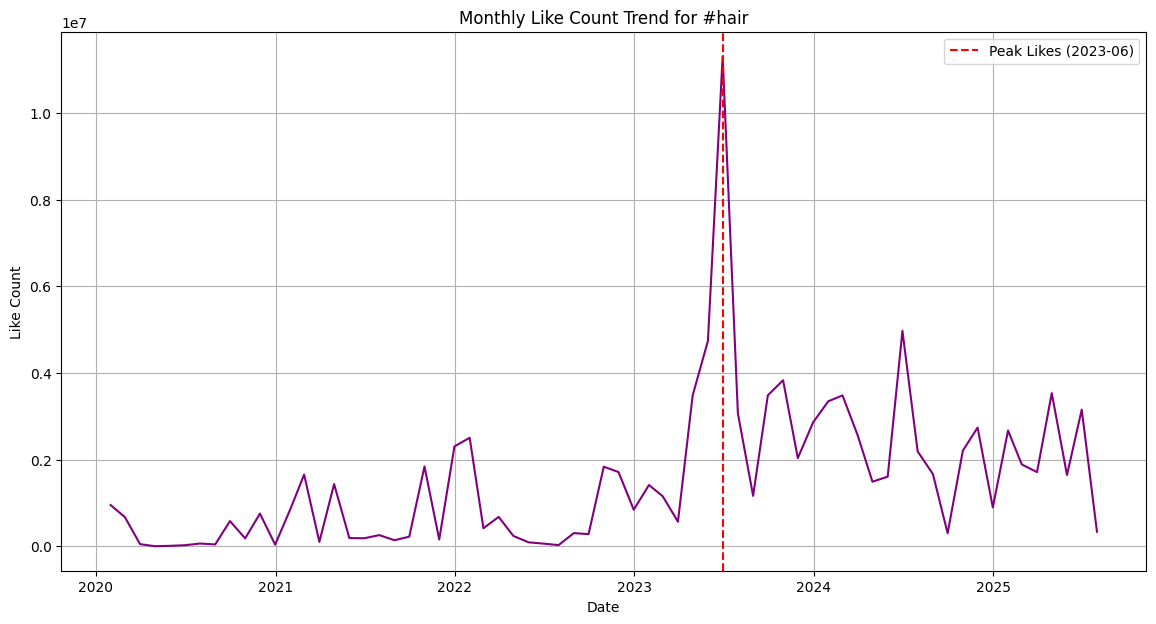

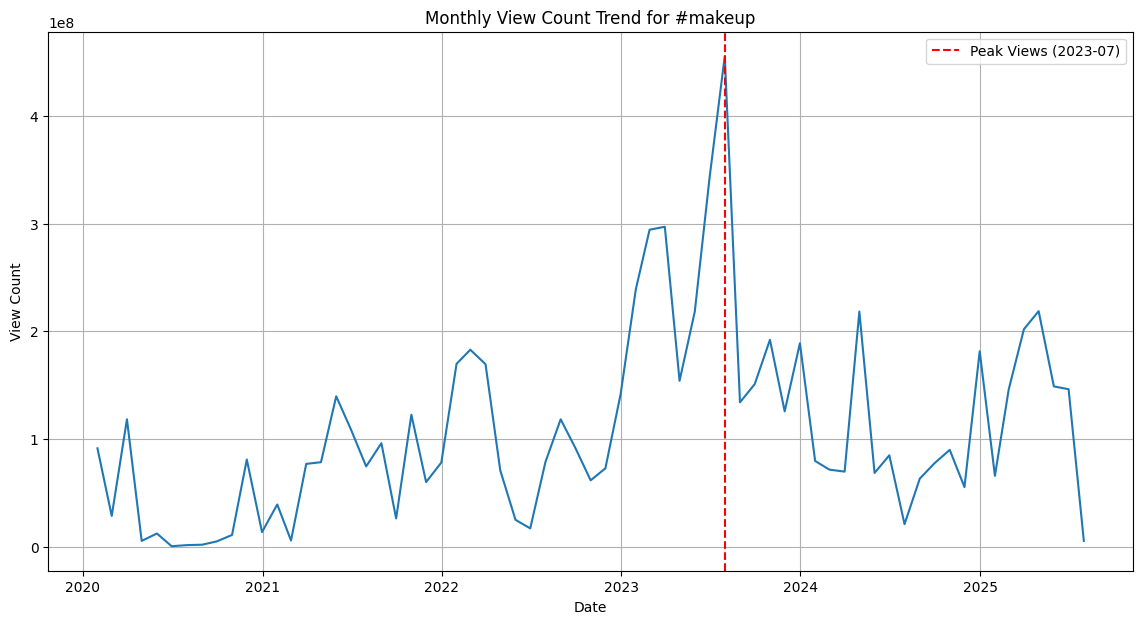

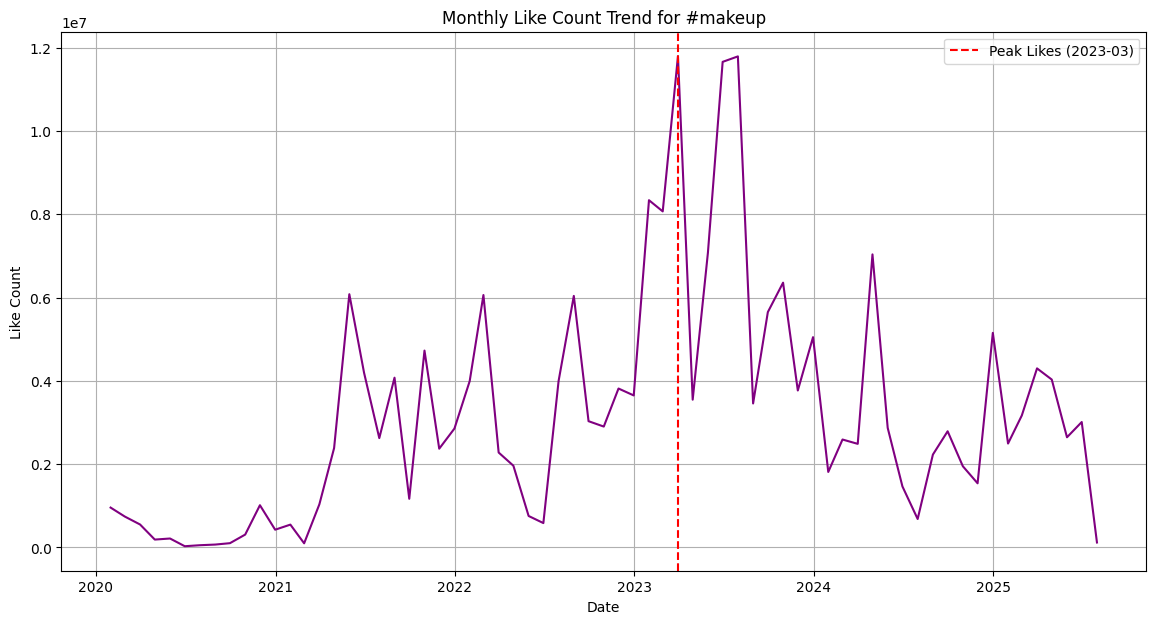

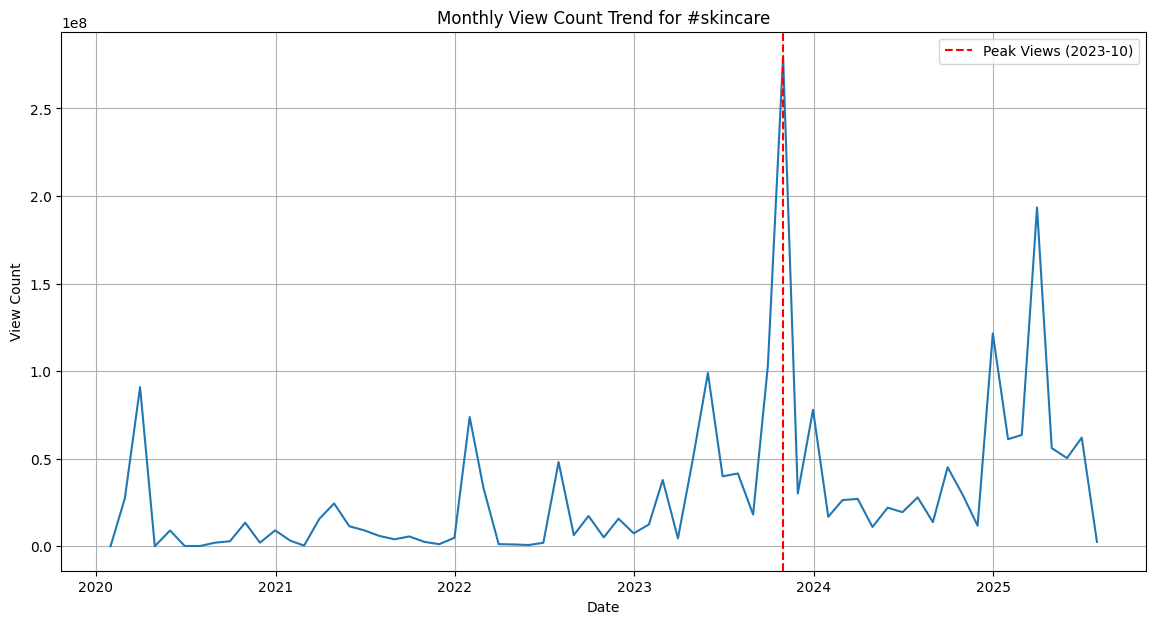

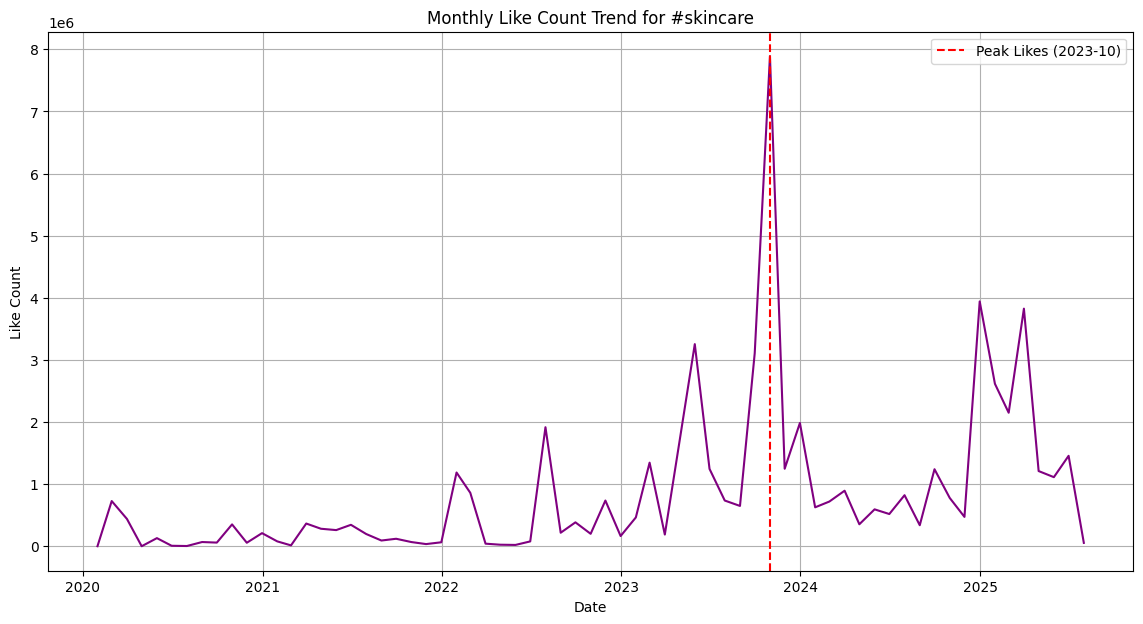

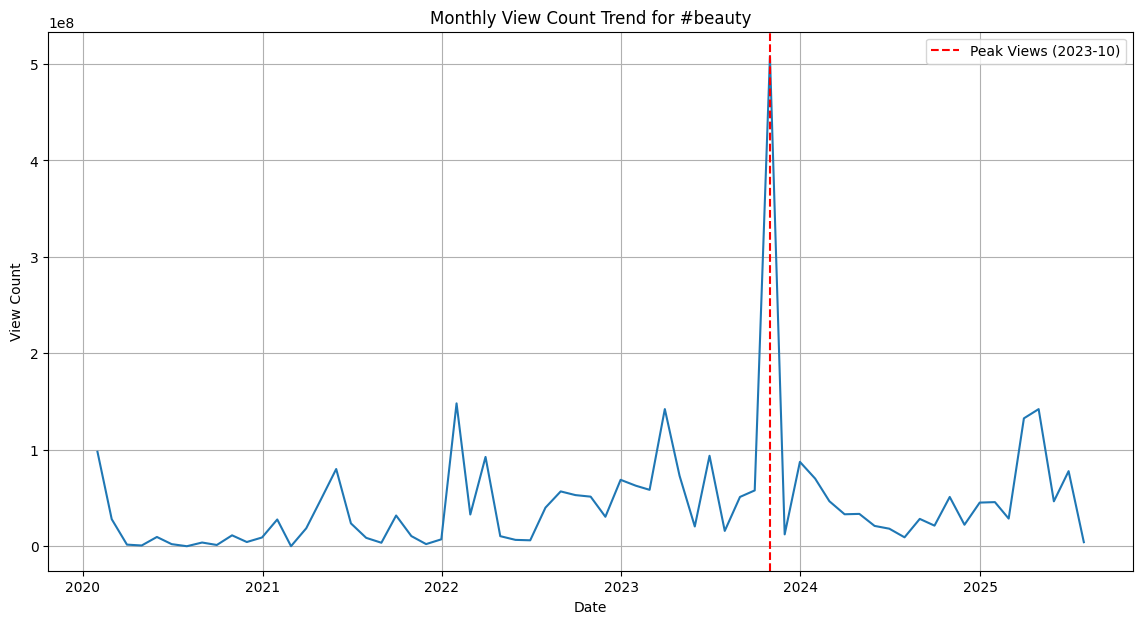

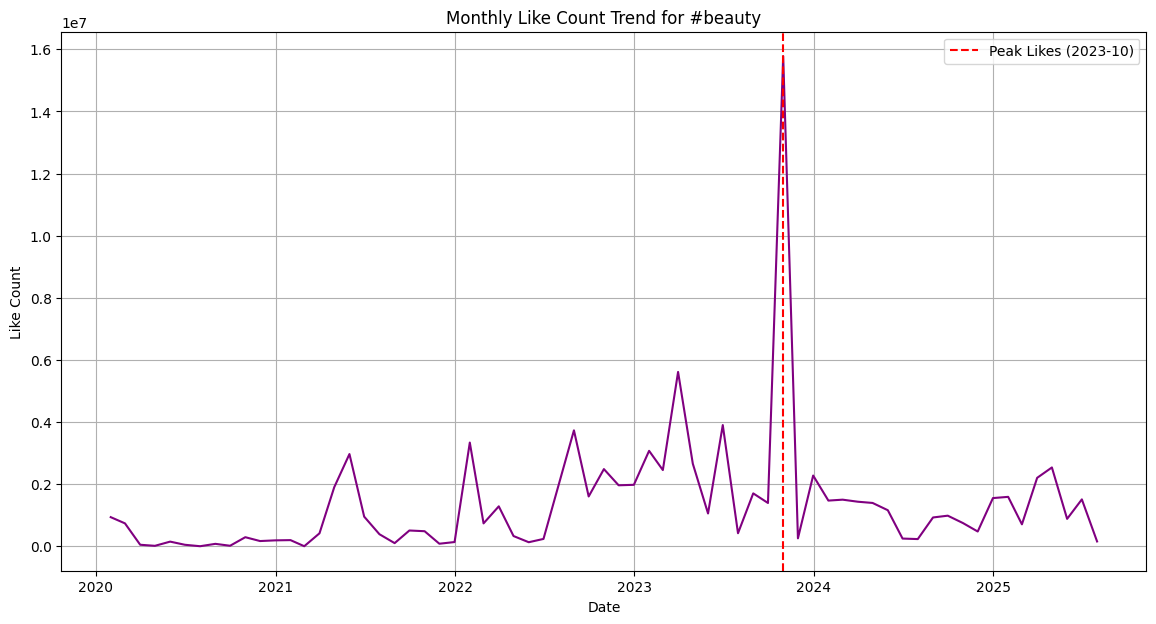

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select a few representative hashtags for visualization
selected_hashtags = ['yoga', 'hair', 'makeup', 'skincare', 'beauty'] # Example selection

# Iterate through each selected hashtag for visualization
for hashtag in selected_hashtags:
    # Extract the monthly view count time series
    view_ts = hashtag_monthly_trends_unstacked[('viewCount', hashtag)]
    # Extract the monthly like count time series
    like_ts = hashtag_monthly_trends_unstacked[('likeCount', hashtag)]

    # Get the peak view time and peak like time from peak_df
    if hashtag in peak_df.index:
        peak_view_time = peak_df.loc[hashtag, 'peak_view_time']
        peak_like_time = peak_df.loc[hashtag, 'peak_like_time']
    else:
        print(f"Peak data not available for hashtag: {hashtag}. Skipping visualization.")
        continue

    # Create a line plot for the view count time series
    plt.figure(figsize=(14, 7))
    sns.lineplot(data=view_ts)
    plt.title(f'Monthly View Count Trend for #{hashtag}')
    plt.xlabel('Date')
    plt.ylabel('View Count')
    # Add a vertical line at the peak view time
    if pd.notnull(peak_view_time):
        plt.axvline(peak_view_time, color='red', linestyle='--', label=f'Peak Views ({peak_view_time.strftime("%Y-%m")})')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Create a line plot for the like count time series
    plt.figure(figsize=(14, 7))
    sns.lineplot(data=like_ts, color='purple')
    plt.title(f'Monthly Like Count Trend for #{hashtag}')
    plt.xlabel('Date')
    plt.ylabel('Like Count')
    # Add a vertical line at the peak like time
    if pd.notnull(peak_like_time):
        plt.axvline(peak_like_time, color='red', linestyle='--', label=f'Peak Likes ({peak_like_time.strftime("%Y-%m")})')
    plt.legend()
    plt.grid(True)
    plt.show()

**Summary**

Data Analysis Key Findings

- The data was successfully aggregated by month, allowing for the analysis of trends in total view and like counts over time.
Analysis focused on a selection of key hashtags including 'yoga', 'hair', 'makeup', 'skincare', 'beauty', 'viral', 'trending', 'shorts', 'lipstick', and 'grwm'.
- Visualizations effectively displayed the monthly trends for selected hashtags ('yoga', 'hair', 'makeup', 'skincare', 'beauty'), highlighting the identified peak times for views and likes on the time series plots.

##Engagement metrics and growth

**Creating new engagement metrics**

Adding `likes_per_view` and `comments_per_view` columns to the DataFrame. These metrics normalize engagement by the number of views, providing insight into the quality of interaction.

In [46]:
# Calculate 'likes_per_view' and 'comments_per_view'
# Add a small epsilon to the denominator to avoid division by zero
epsilon = 1e-9
df['likes_per_view'] = df['likeCount'] / (df['viewCount'] + epsilon)
df['comments_per_view'] = df['commentCount'] / (df['viewCount'] + epsilon)

# Display the first few rows with the new columns
display(df[['viewCount', 'likeCount', 'commentCount', 'likes_per_view', 'comments_per_view']].head())

# Display the data types to verify the new columns
display(df.info())

viewCount  likeCount  commentCount  likes_per_view  comments_per_view
1      257.0        7.0           0.0        0.027237           0.000000
2      164.0        4.0           2.0        0.024390           0.012195
3     1207.0       20.0           0.0        0.016570           0.000000
4     8647.0      268.0           7.0        0.030993           0.000810
5     1366.0       15.0           0.0        0.010981           0.000000

<class 'pandas.core.frame.DataFrame'>
Index: 73778 entries, 1 to 92758
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   videoId                   73778 non-null  int64         
 1   publishedAt               73778 non-null  datetime64[ns]
 2   channelId                 73778 non-null  int64         
 3   title                     73778 non-null  object        
 4   description               31912 non-null  object        
 5   tags                      20889 non-null  object        
 6   allTags                   73778 non-null  object        
 7   allTags_array             73778 non-null  object        
 8   contentDuration(seconds)  73778 non-null  int64         
 9   viewCount                 73778 non-null  float64       
 10  likeCount                 69243 non-null  float64       
 11  commentCount              72764 non-null  float64       
 12  topicCategories        

None

**Distribution of Engagement Ratios (likes\_per\_view and comments\_per\_view)**

Visualizing the distributions of `likes_per_view` and `comments_per_view` to check for skewness.

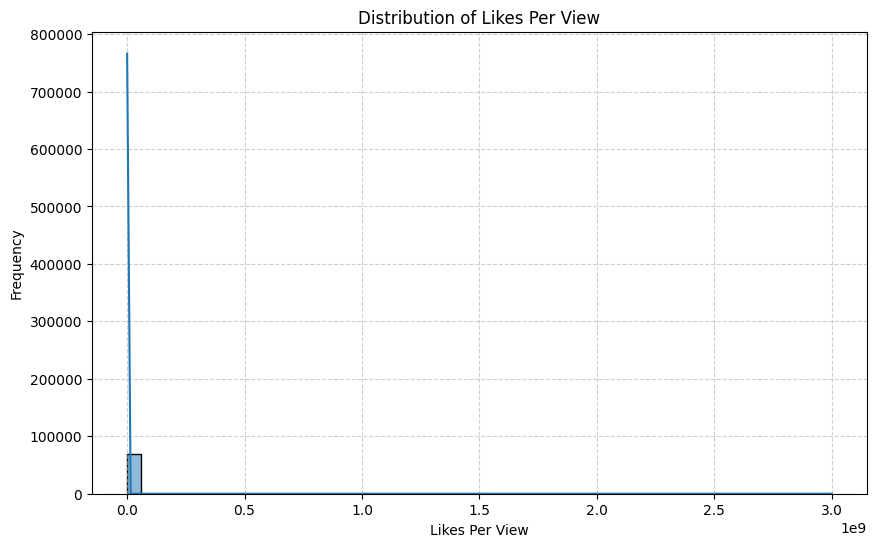

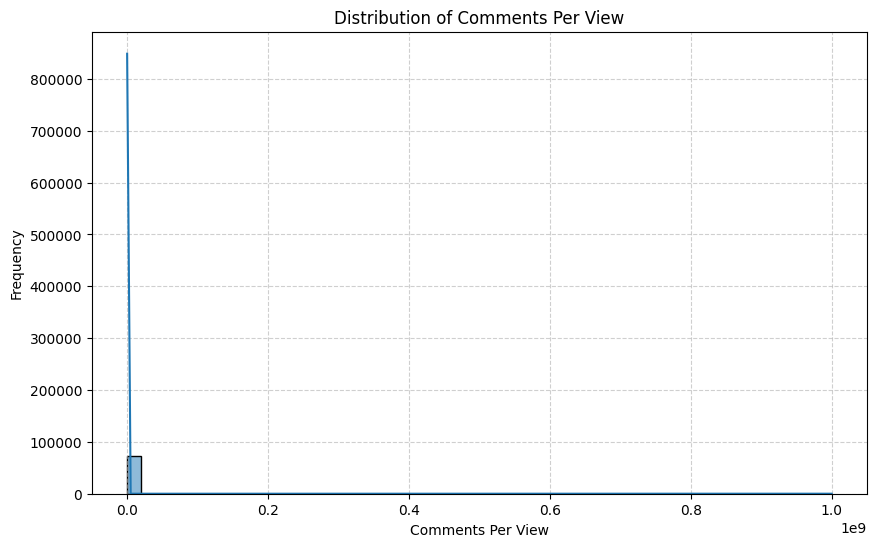

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution plot for Likes Per View
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='likes_per_view', kde=True, bins=50)
plt.title('Distribution of Likes Per View')
plt.xlabel('Likes Per View')
plt.ylabel('Frequency')
# Consider adding a log scale if the distribution is highly skewed towards zero
# plt.xscale('log')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Distribution plot for Comments Per View
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='comments_per_view', kde=True, bins=50)
plt.title('Distribution of Comments Per View')
plt.xlabel('Comments Per View')
plt.ylabel('Frequency')
# Consider adding a log scale if the distribution is highly skewed towards zero
# plt.xscale('log')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

**Aggregating Engagement Metrics by Tag and Time**

We will group the data by the cleaned tags (`allTags_cleaned`) and the month of publication (`month_of_year`) to calculate the average `likes_per_view` and `comments_per_view` for each tag within each month.

In [48]:
import pandas as pd
import itertools

# Explode the DataFrame by the cleaned tags to have one row per hashtag per video
exploded_cleaned_tags_df = df.explode('allTags_cleaned')

# Group by cleaned tag and month of year, and calculate the mean of engagement metrics
# Drop rows with NaN in 'allTags_cleaned' before grouping to avoid potential issues
hashtag_monthly_engagement = exploded_cleaned_tags_df.dropna(subset=['allTags_cleaned']).groupby(
    ['allTags_cleaned', 'month_of_year']
)[['likes_per_view', 'comments_per_view']].mean().reset_index()

# Display the first few rows of the resulting DataFrame
display(hashtag_monthly_engagement.head())

# Display the info to check the structure
display(hashtag_monthly_engagement.info())

allTags_cleaned month_of_year  likes_per_view  comments_per_view
0                      Apr 2020        0.031681           0.002249
1                      Apr 2021        0.011716           0.000129
2                      Apr 2022        0.033046           0.001100
3                      Apr 2023        0.037856           0.003802
4                      Apr 2024        0.017811           0.001839

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352812 entries, 0 to 352811
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   allTags_cleaned    352812 non-null  object 
 1   month_of_year      352812 non-null  object 
 2   likes_per_view     331424 non-null  float64
 3   comments_per_view  348993 non-null  float64
dtypes: float64(2), object(2)
memory usage: 10.8+ MB


None

**Visualize Engagement Metric Trends**

Create line plots to visualize how the average `likes_per_view` and `comments_per_view` change over time for a selection of key hashtags.

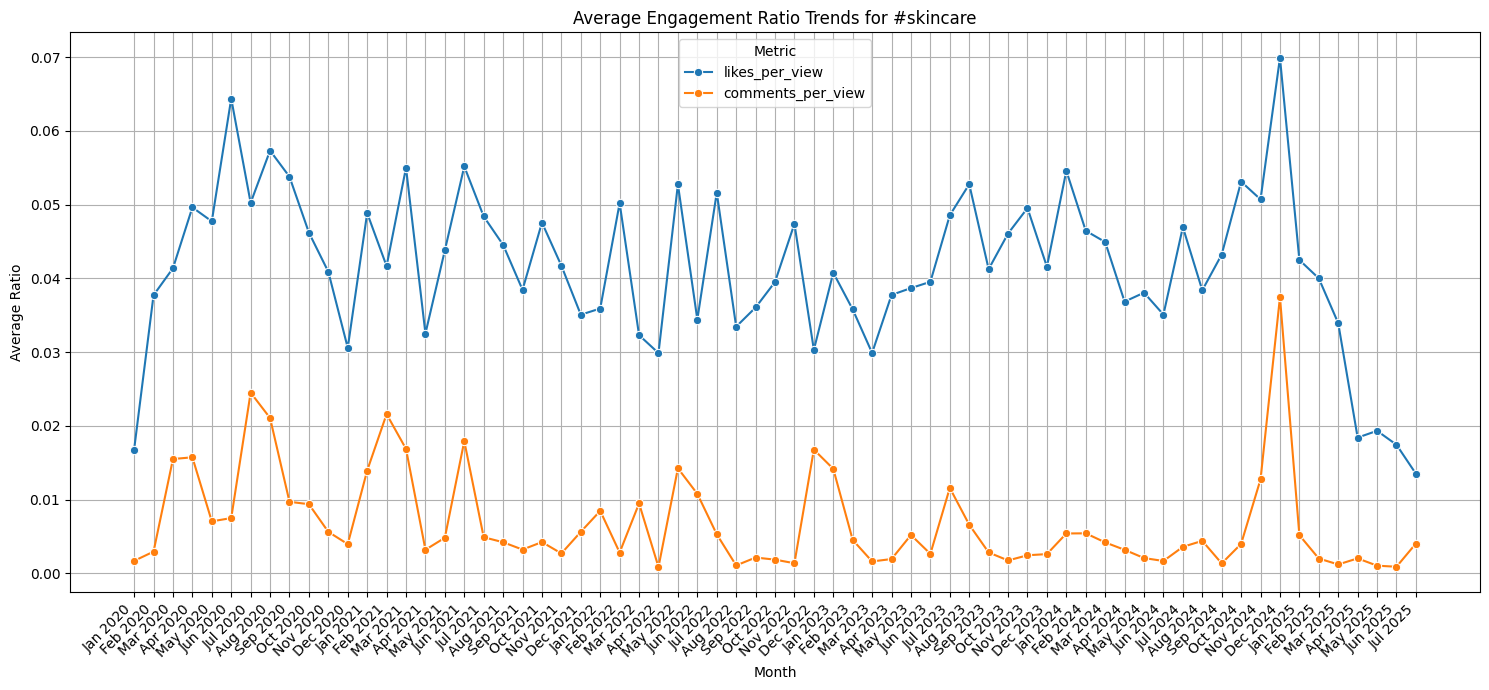

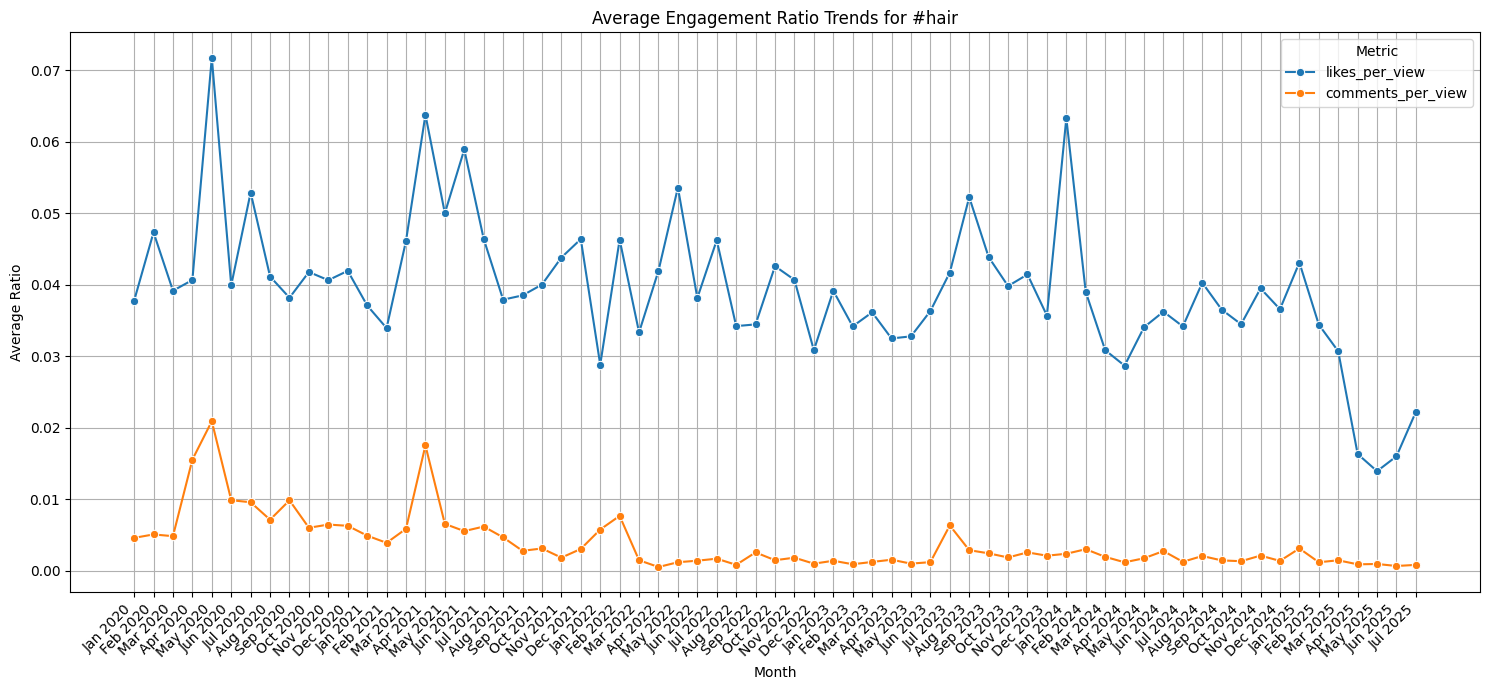

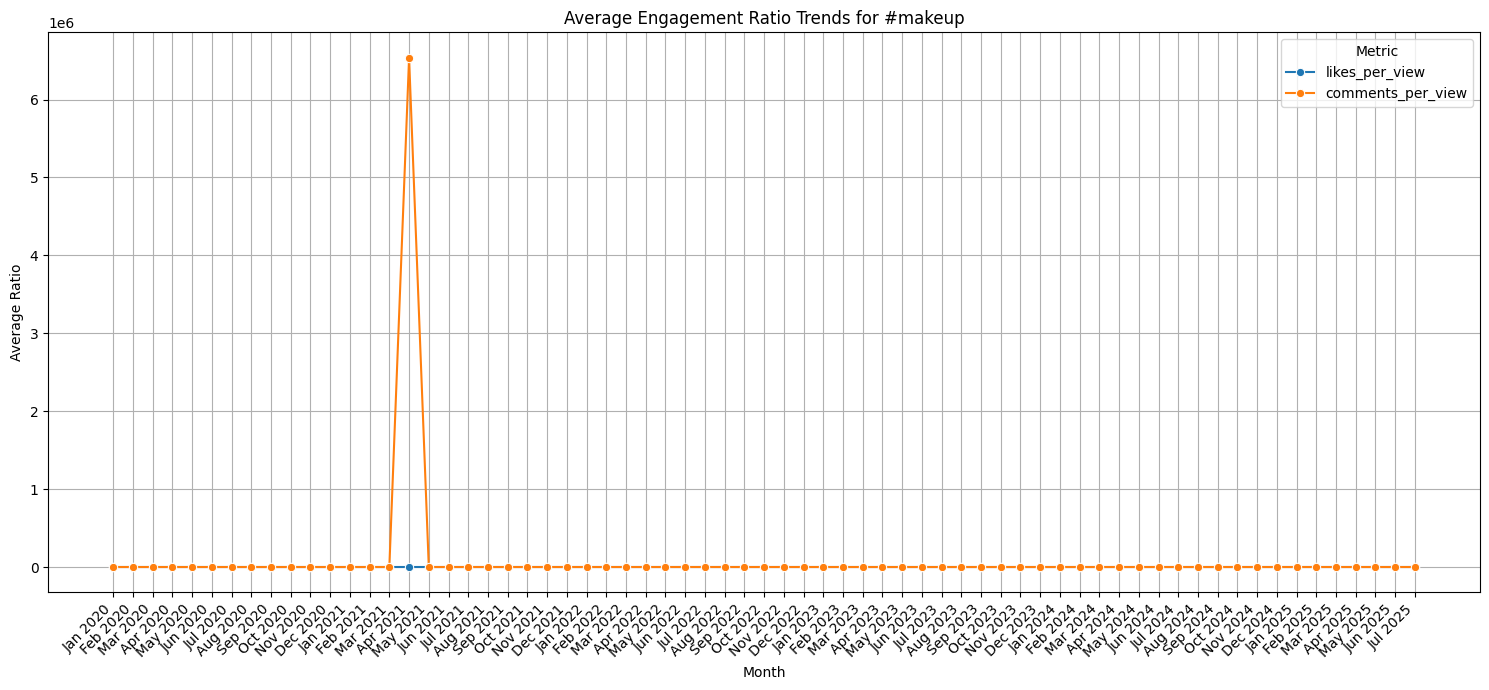

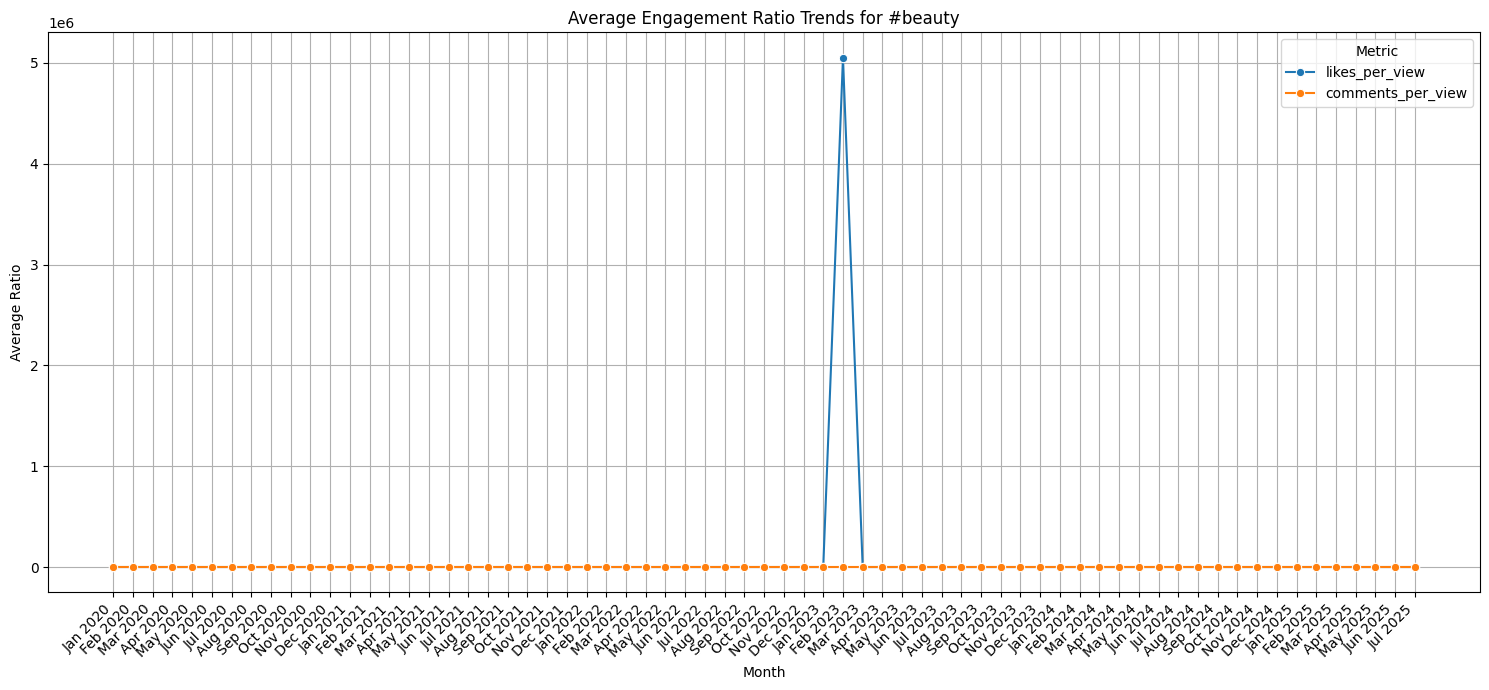

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'month_of_year' is in a format that can be sorted chronologically for plotting
# Convert 'month_of_year' to datetime objects for correct sorting
hashtag_monthly_engagement['sort_date'] = pd.to_datetime(hashtag_monthly_engagement['month_of_year'], format='%b %Y')

# Sort the DataFrame by hashtag and the sorting date
hashtag_monthly_engagement = hashtag_monthly_engagement.sort_values(by=['allTags_cleaned', 'sort_date'])

# Drop the temporary sort column
hashtag_monthly_engagement = hashtag_monthly_engagement.drop(columns=['sort_date'])


# Select a few key hashtags for visualization
# You can change this list based on your analysis of hashtag frequency and engagement
selected_hashtags = ['skincare', 'hair', 'makeup', 'beauty']


# Iterate through each selected hashtag and create plots
for hashtag in selected_hashtags:
    # Filter the DataFrame for the current hashtag
    hashtag_data = hashtag_monthly_engagement[hashtag_monthly_engagement['allTags_cleaned'] == hashtag]

    if not hashtag_data.empty:
        # Melt the DataFrame to long format for easier plotting with Seaborn
        hashtag_data_melted = hashtag_data.melt(
            id_vars='month_of_year',
            value_vars=['likes_per_view', 'comments_per_view'],
            var_name='Metric',
            value_name='Average Engagement Ratio'
        )

        # Create the line plot
        plt.figure(figsize=(15, 7))
        sns.lineplot(data=hashtag_data_melted, x='month_of_year', y='Average Engagement Ratio', hue='Metric', marker='o')

        plt.title(f'Average Engagement Ratio Trends for #{hashtag}')
        plt.xlabel('Month')
        plt.ylabel('Average Ratio')
        plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for readability
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    else:
        print(f"No data available for hashtag: #{hashtag}")

**Combined Visualization of Raw Counts and Engagement Ratios for Key Hashtags**

Creating plots that show both the monthly total view/like counts and the monthly average likes/comments per view for selected hashtags.

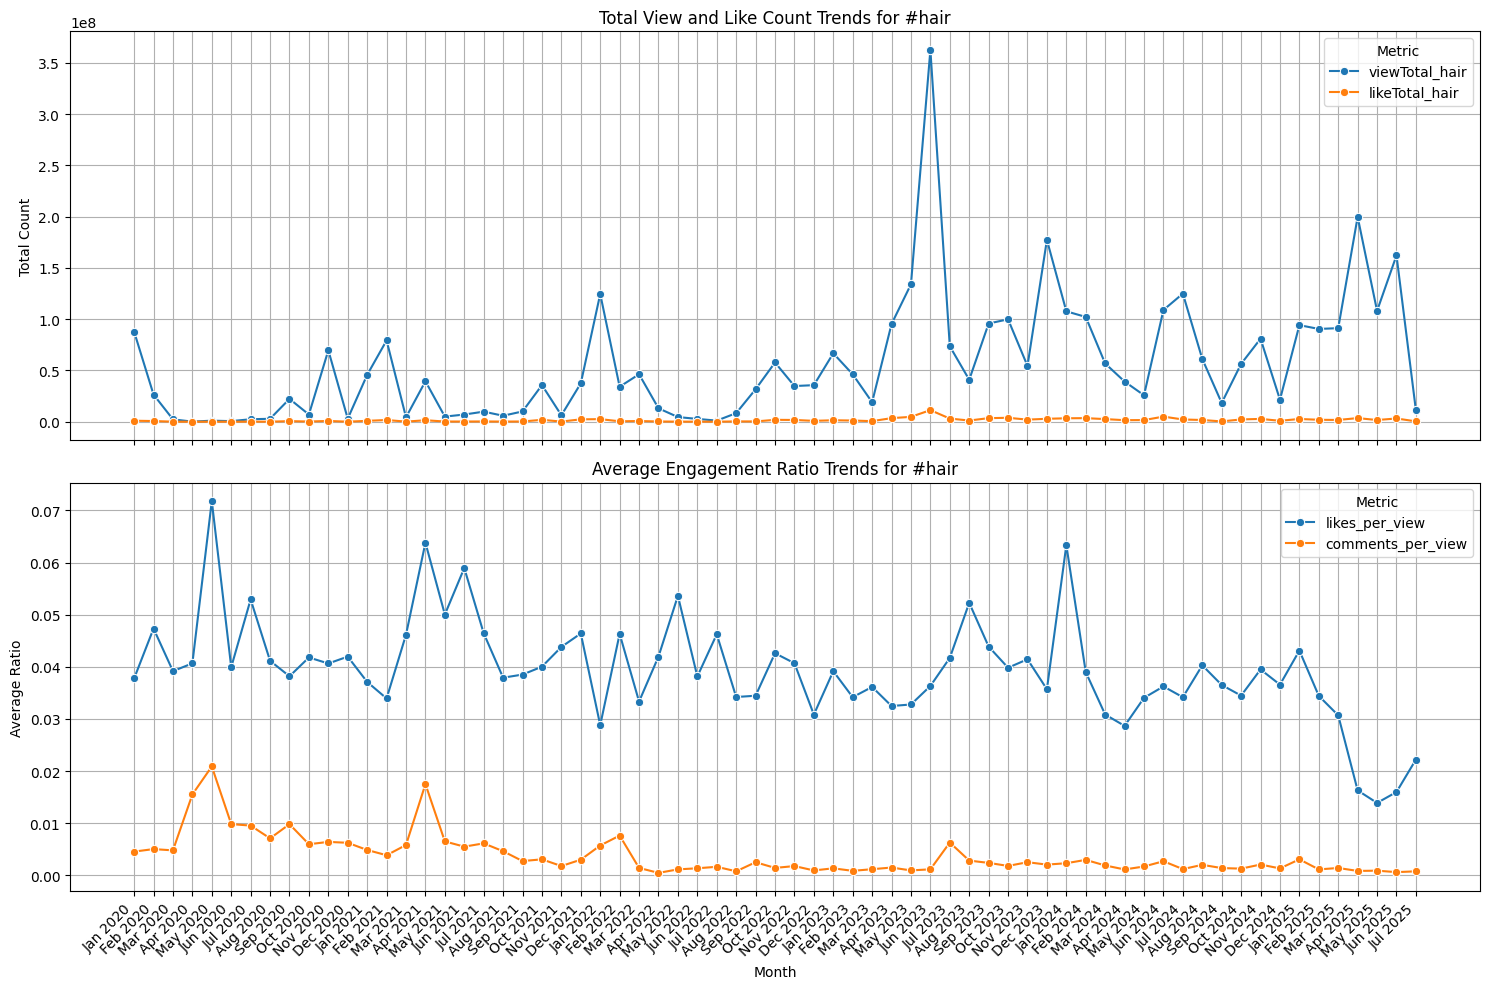

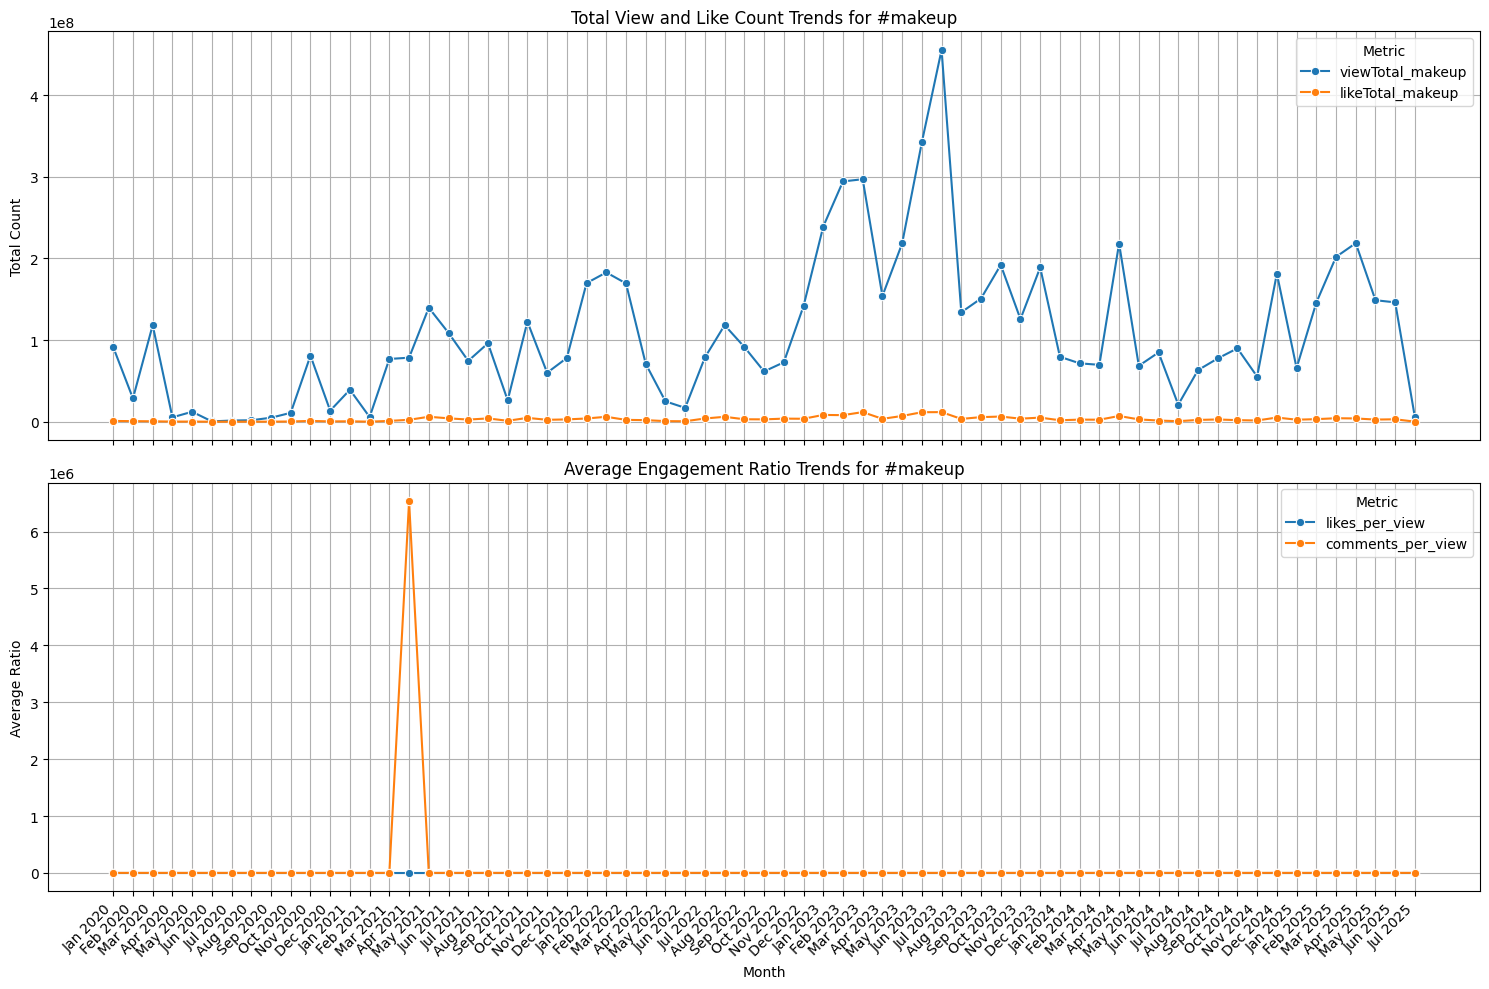

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the hashtags for combined visualization
selected_hashtags_combined = ['hair', 'makeup']

# Ensure hashtag_monthly_engagement has 'month_of_year' as datetime for sorting
hashtag_monthly_engagement['sort_date'] = pd.to_datetime(hashtag_monthly_engagement['month_of_year'], format='%b %Y')
hashtag_monthly_engagement = hashtag_monthly_engagement.sort_values(by=['allTags_cleaned', 'sort_date']).drop(columns=['sort_date'])

# Ensure hashtag_monthly_trends_unstacked has a date index for merging
# It should already have a DatetimeIndex if the previous steps were followed.
# If not, you might need to reset the index and convert the date column.

# Iterate through each selected hashtag and create combined plots
for hashtag in selected_hashtags_combined:
    # Extract the monthly view and like count time series from the unstacked DataFrame
    if ('viewCount', hashtag) in hashtag_monthly_trends_unstacked.columns and ('likeCount', hashtag) in hashtag_monthly_trends_unstacked.columns:
        raw_counts_ts = hashtag_monthly_trends_unstacked[[('viewCount', hashtag), ('likeCount', hashtag)]]
        # Rename columns for easier merging/plotting
        raw_counts_ts.columns = ['_'.join(col).replace('Count_', 'Total_') for col in raw_counts_ts.columns]
        raw_counts_ts = raw_counts_ts.reset_index().rename(columns={'publishedAt': 'month_of_year'})
        # Convert month_of_year to the same format as in hashtag_monthly_engagement
        raw_counts_ts['month_of_year'] = raw_counts_ts['month_of_year'].dt.strftime('%b %Y')
    else:
        print(f"Raw count data not available for hashtag: #{hashtag}. Skipping combined visualization.")
        continue

    # Filter the engagement metrics DataFrame for the current hashtag
    engagement_metrics_data = hashtag_monthly_engagement[hashtag_monthly_engagement['allTags_cleaned'] == hashtag].copy()

    if not engagement_metrics_data.empty:
        # Merge the raw counts and engagement metrics DataFrames on 'month_of_year'
        combined_data = pd.merge(raw_counts_ts, engagement_metrics_data, on='month_of_year', how='inner')

        # Melt the combined DataFrame for plotting raw counts
        raw_counts_melted = combined_data.melt(
            id_vars='month_of_year',
            value_vars=[f'viewTotal_{hashtag}', f'likeTotal_{hashtag}'], # Corrected column names
            var_name='Metric',
            value_name='Total Count'
        )

        # Melt the combined DataFrame for plotting engagement ratios
        engagement_metrics_melted = combined_data.melt(
            id_vars='month_of_year',
            value_vars=['likes_per_view', 'comments_per_view'],
            var_name='Metric',
            value_name='Average Engagement Ratio'
        )

        # Create a figure with two subplots (one for raw counts, one for engagement ratios)
        fig, axes = plt.subplots(2, 1, figsize=(15, 10), sharex=True)

        # Plot raw counts
        sns.lineplot(data=raw_counts_melted, x='month_of_year', y='Total Count', hue='Metric', marker='o', ax=axes[0])
        axes[0].set_title(f'Total View and Like Count Trends for #{hashtag}')
        axes[0].set_ylabel('Total Count')
        axes[0].grid(True)

        # Plot engagement ratios
        sns.lineplot(data=engagement_metrics_melted, x='month_of_year', y='Average Engagement Ratio', hue='Metric', marker='o', ax=axes[1])
        axes[1].set_title(f'Average Engagement Ratio Trends for #{hashtag}')
        axes[1].set_xlabel('Month')
        axes[1].set_ylabel('Average Ratio')
        axes[1].grid(True)

        # Rotate x-axis labels for readability
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    else:
        print(f"Engagement metrics data not available for hashtag: #{hashtag}. Skipping combined visualization.")

Calculating growth for tags

**Step 1: Filter for 'hair' hashtag and prepare engagement metrics**

Filter the DataFrame to include only videos tagged with 'hair' and select the relevant columns (`publishedAt`, `likes_per_view`, `comments_per_view`).

In [51]:
# Filter the DataFrame for rows where 'hair' is in the 'allTags_cleaned' list
# Ensure 'allTags_cleaned' is treated as a list, handling potential non-list entries if any exist
hair_df = df[df['allTags_cleaned'].apply(lambda x: 'hair' in x if isinstance(x, list) else False)].copy()

# Select relevant columns: 'publishedAt', 'likes_per_view', 'comments_per_view'
hair_engagement_df = hair_df[['publishedAt', 'likes_per_view', 'comments_per_view']].copy()

# Display the first few rows of the filtered DataFrame
display(hair_engagement_df.head())

# Display the info to check the structure and data types
display(hair_engagement_df.info())

publishedAt  likes_per_view  comments_per_view
23  2025-04-30        0.006881           0.000000
24  2024-12-26        0.013300           0.000000
26  2024-11-21        0.027397           0.000000
28  2023-03-07        0.019653           0.000385
38  2025-05-24        0.011949           0.000140

<class 'pandas.core.frame.DataFrame'>
Index: 17890 entries, 23 to 92754
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   publishedAt        17890 non-null  datetime64[ns]
 1   likes_per_view     16929 non-null  float64       
 2   comments_per_view  17726 non-null  float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 559.1 KB


None

**Step 2: Aggregate by time**

Group the data by month and calculate the median and IQR for `likes_per_view` and `comments_per_view`.

In [52]:
# Ensure 'publishedAt' is in datetime format and set it as the index
hair_engagement_df['publishedAt'] = pd.to_datetime(hair_engagement_df['publishedAt'])
hair_engagement_indexed = hair_engagement_df.set_index('publishedAt')

# Resample monthly ('M') and calculate median and IQR for engagement metrics
monthly_hair_engagement_stats = hair_engagement_indexed[['likes_per_view', 'comments_per_view']].resample('M').agg(['median', lambda x: x.quantile(0.75) - x.quantile(0.25)])

# Rename the IQR columns for clarity
monthly_hair_engagement_stats.rename(columns={'<lambda_0>': 'IQR'}, level=1, inplace=True)


# Display the first few rows of the resulting DataFrame
display(monthly_hair_engagement_stats.head())

# Display the info to check the structure
display(monthly_hair_engagement_stats.info())

/tmp/ipython-input-3773024974.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_hair_engagement_stats = hair_engagement_indexed[['likes_per_view', 'comments_per_view']].resample('M').agg(['median', lambda x: x.quantile(0.75) - x.quantile(0.25)])


likes_per_view           comments_per_view          
                    median       IQR            median       IQR
publishedAt                                                     
2020-01-31        0.025546  0.049672          0.000688  0.001778
2020-02-29        0.022166  0.082724          0.000475  0.002036
2020-03-31        0.020270  0.043126          0.001277  0.004285
2020-04-30        0.036609  0.038532          0.004255  0.009276
2020-05-31        0.023254  0.052149          0.000819  0.001934

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 67 entries, 2020-01-31 to 2025-07-31
Freq: ME
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   (likes_per_view, median)     67 non-null     float64
 1   (likes_per_view, IQR)        67 non-null     float64
 2   (comments_per_view, median)  67 non-null     float64
 3   (comments_per_view, IQR)     67 non-null     float64
dtypes: float64(4)
memory usage: 2.6 KB


None

**Step 3: Identify growth periods**

Calculate the growth threshold based on Median + 1.5 * IQR and identify the time periods where the median engagement metrics for 'hair' exceed this threshold.

In [53]:
# Define the growth threshold multiplier (1.5 is a common value for outliers)
iqr_multiplier = 1.5

# Calculate the growth threshold for likes_per_view
monthly_hair_engagement_stats[('likes_per_view', 'growth_threshold')] = \
    monthly_hair_engagement_stats[('likes_per_view', 'median')] + \
    iqr_multiplier * monthly_hair_engagement_stats[('likes_per_view', 'IQR')]

# Calculate the growth threshold for comments_per_view
monthly_hair_engagement_stats[('comments_per_view', 'growth_threshold')] = \
    monthly_hair_engagement_stats[('comments_per_view', 'median')] + \
    iqr_multiplier * monthly_hair_engagement_stats[('comments_per_view', 'IQR')]

# Identify the months that are considered growth periods for each metric
monthly_hair_engagement_stats[('likes_per_view', 'is_growth')] = \
    monthly_hair_engagement_stats[('likes_per_view', 'median')] > \
    monthly_hair_engagement_stats[('likes_per_view', 'growth_threshold')]

monthly_hair_engagement_stats[('comments_per_view', 'is_growth')] = \
    monthly_hair_engagement_stats[('comments_per_view', 'median')] > \
    monthly_hair_engagement_stats[('comments_per_view', 'growth_threshold')]

# Display the DataFrame with the calculated thresholds and growth indicators
display(monthly_hair_engagement_stats.head())

likes_per_view           comments_per_view            \
                    median       IQR            median       IQR   
publishedAt                                                        
2020-01-31        0.025546  0.049672          0.000688  0.001778   
2020-02-29        0.022166  0.082724          0.000475  0.002036   
2020-03-31        0.020270  0.043126          0.001277  0.004285   
2020-04-30        0.036609  0.038532          0.004255  0.009276   
2020-05-31        0.023254  0.052149          0.000819  0.001934   

              likes_per_view comments_per_view likes_per_view  \
            growth_threshold  growth_threshold      is_growth   
publishedAt                                                     
2020-01-31          0.100055          0.003356          False   
2020-02-29          0.146252          0.003528          False   
2020-03-31          0.084959          0.007705          False   
2020-04-30          0.094407          0.018170          False   
2020-05-31          0.101477          0.003720          False   

            comments_per_view  
                    is_growth  
publishedAt                    
2020-01-31              False  
2020-02-29              False  
2020-03-31              False  
2020-04-30              False  
2020-05-31              False

**Step 4: Visualize growth periods**

Plot the median engagement metrics over time for 'hair' and highlight the identified growth periods.

/tmp/ipython-input-1326236706.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


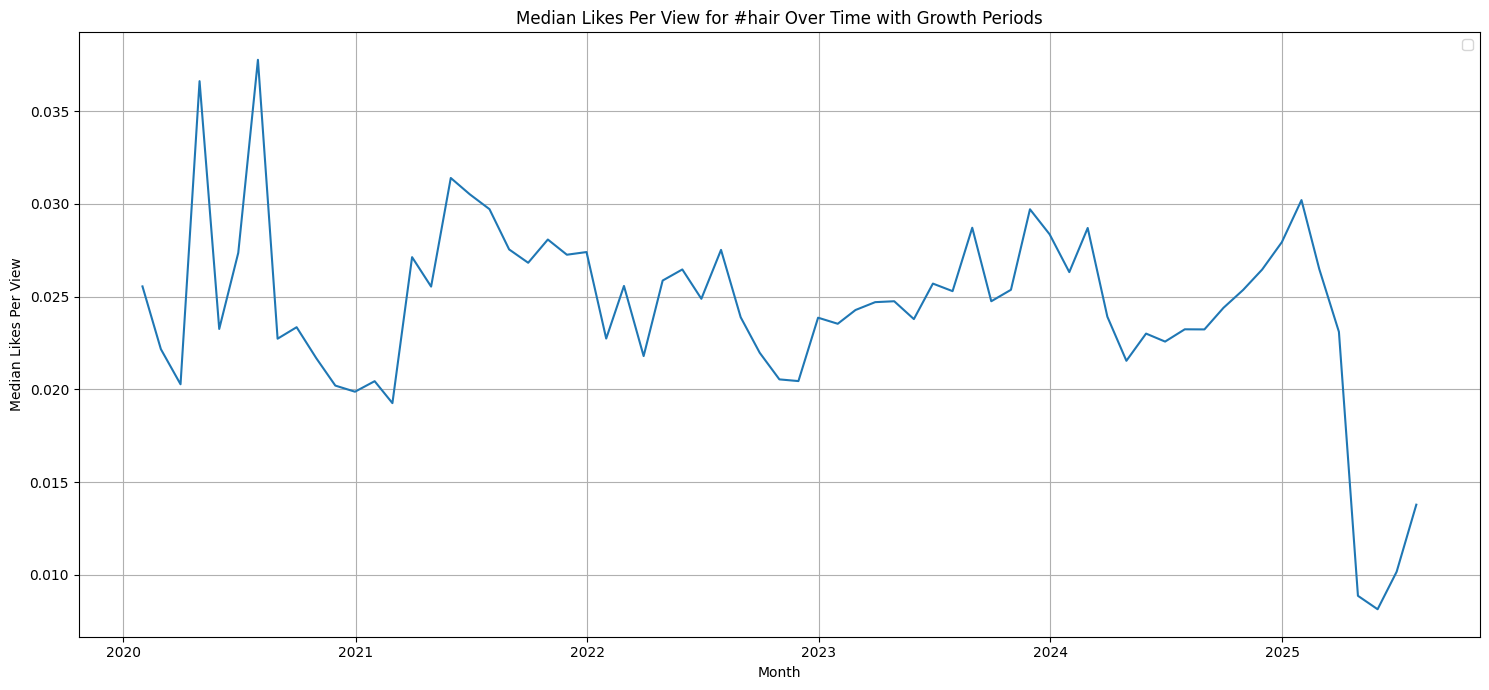

/tmp/ipython-input-1326236706.py:38: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


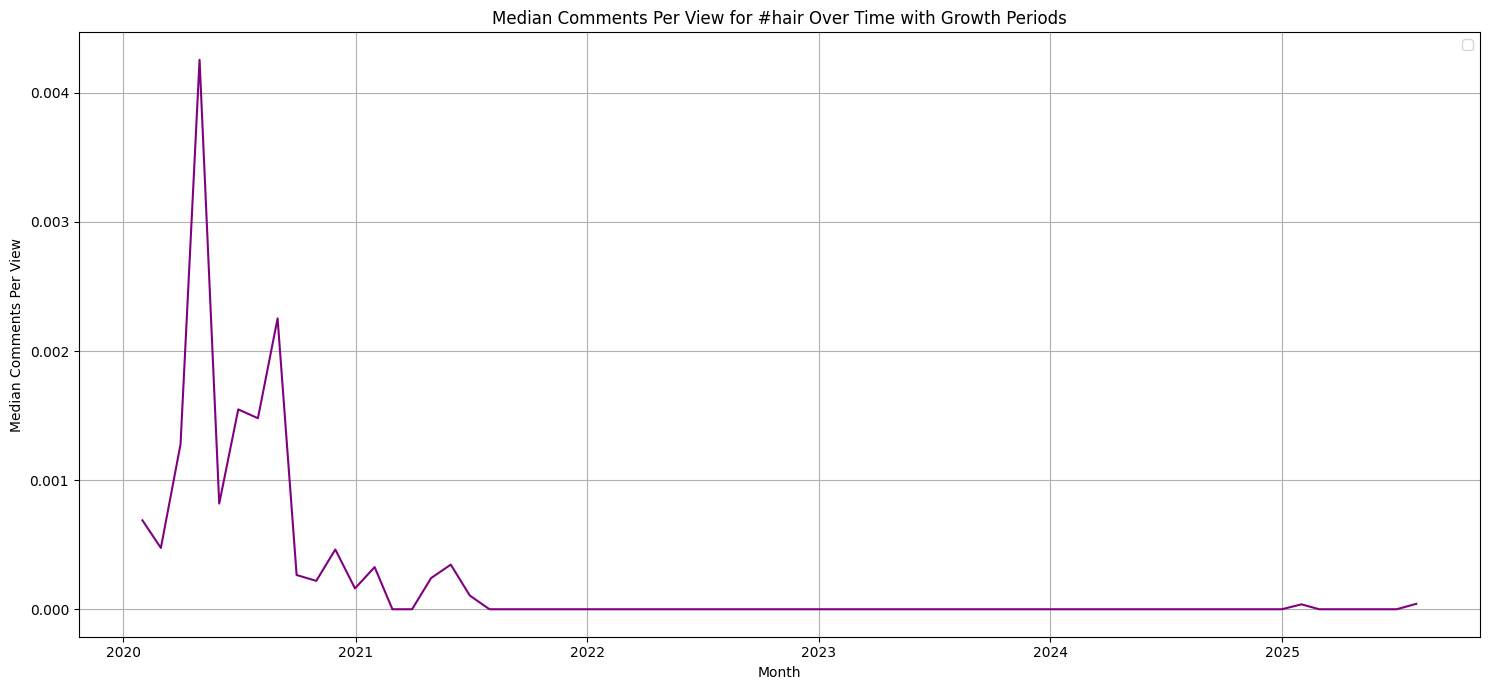

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the index is in datetime format for plotting
monthly_hair_engagement_stats.index = pd.to_datetime(monthly_hair_engagement_stats.index)

# Plot Median Likes Per View with Growth Periods Highlighted
plt.figure(figsize=(15, 7))
sns.lineplot(data=monthly_hair_engagement_stats, x=monthly_hair_engagement_stats.index, y=('likes_per_view', 'median'))

# Highlight growth periods
growth_periods_likes = monthly_hair_engagement_stats[monthly_hair_engagement_stats[('likes_per_view', 'is_growth')]]
for date in growth_periods_likes.index:
    plt.axvline(date, color='red', linestyle='--', alpha=0.6, label='Growth Period' if date == growth_periods_likes.index[0] else "")

plt.title('Median Likes Per View for #hair Over Time with Growth Periods')
plt.xlabel('Month')
plt.ylabel('Median Likes Per View')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Plot Median Comments Per View with Growth Periods Highlighted
plt.figure(figsize=(15, 7))
sns.lineplot(data=monthly_hair_engagement_stats, x=monthly_hair_engagement_stats.index, y=('comments_per_view', 'median'), color='purple')

# Highlight growth periods
growth_periods_comments = monthly_hair_engagement_stats[monthly_hair_engagement_stats[('comments_per_view', 'is_growth')]]
for date in growth_periods_comments.index:
    plt.axvline(date, color='red', linestyle='--', alpha=0.6, label='Growth Period' if date == growth_periods_comments.index[0] else "")


plt.title('Median Comments Per View for #hair Over Time with Growth Periods')
plt.xlabel('Month')
plt.ylabel('Median Comments Per View')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


##Outliers exploration

In [55]:
# Select the target columns for outlier identification
target_columns = ['viewCount', 'likeCount', 'commentCount']

# Dictionary to store outlier information (bounds and outlier rows)
outlier_info = {}

# Identify top-end outliers for each target column
for col in target_columns:
    # Calculate Q1, Q3, and IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate the upper bound for top-end outliers (Q3 + 1.5 * IQR)
    upper_bound = Q3 + 1.5 * IQR

    # Identify rows where the column value is above the upper bound
    top_outliers = df[df[col] > upper_bound].copy()

    # Store the upper bound and the identified outlier rows
    outlier_info[col] = {
        'upper_bound': upper_bound,
        'top_outliers': top_outliers
    }

    # Display the number of top-end outliers found and the upper bound
    print(f"'{col}':")
    print(f"  Upper bound (Q3 + 1.5*IQR): {upper_bound:.2f}")
    print(f"  Number of top-end outliers: {len(top_outliers)}")
    print("-" * 30)

# You can access the outlier DataFrames like this:
# view_outliers_df = outlier_info['viewCount']['top_outliers']
# like_outliers_df = outlier_info['likeCount']['top_outliers']
# comment_outliers_df = outlier_info['commentCount']['top_outliers']

'viewCount':
  Upper bound (Q3 + 1.5*IQR): 10062.50
  Number of top-end outliers: 12898
------------------------------
'likeCount':
  Upper bound (Q3 + 1.5*IQR): 209.50
  Number of top-end outliers: 12320
------------------------------
'commentCount':
  Upper bound (Q3 + 1.5*IQR): 7.50
  Number of top-end outliers: 12209
------------------------------


In [56]:
from collections import Counter
import itertools

# Extract the 'top_outliers' DataFrames for each metric
view_outliers_df = outlier_info['viewCount']['top_outliers']
like_outliers_df = outlier_info['likeCount']['top_outliers']
comment_outliers_df = outlier_info['commentCount']['top_outliers']

# Combine the 'allTags_cleaned' from all outlier DataFrames
# We'll use a set to get unique videos before extracting tags to avoid
# counting tags from the same video multiple times if it's an outlier
# in more than one metric.
all_outlier_videos = pd.concat([view_outliers_df, like_outliers_df, comment_outliers_df]).drop_duplicates(subset=['videoId'])

# Extract the 'allTags_cleaned' column from the combined outlier videos
outlier_tags_list_of_lists = all_outlier_videos['allTags_cleaned'].dropna().tolist()

# Flatten the list of lists into a single list of all tags
all_outlier_tags = list(itertools.chain.from_iterable(outlier_tags_list_of_lists))

# Count the occurrences of each tag
outlier_tag_counts = Counter(all_outlier_tags)

# Convert to a DataFrame for easier display and sorting
outlier_tag_counts_df = pd.DataFrame.from_dict(outlier_tag_counts, orient='index', columns=['count']).sort_values(by='count', ascending=False)

# Display the top 20 most frequent tags among the outliers
print("Top 20 most frequent tags among top-end outliers:")
display(outlier_tag_counts_df.head(20))

Top 20 most frequent tags among top-end outliers:


count
shorts           6779
makeup           5505
hair             3792
skincare         2864
beauty           2714
trending         1615
viral            1604
grwm              931
39                920
fashion           776
fyp               693
youtube           582
lipstick          546
blush             436
tutorial          384
aesthetic         384
contour           382
style             380
transformation    377
styling           337

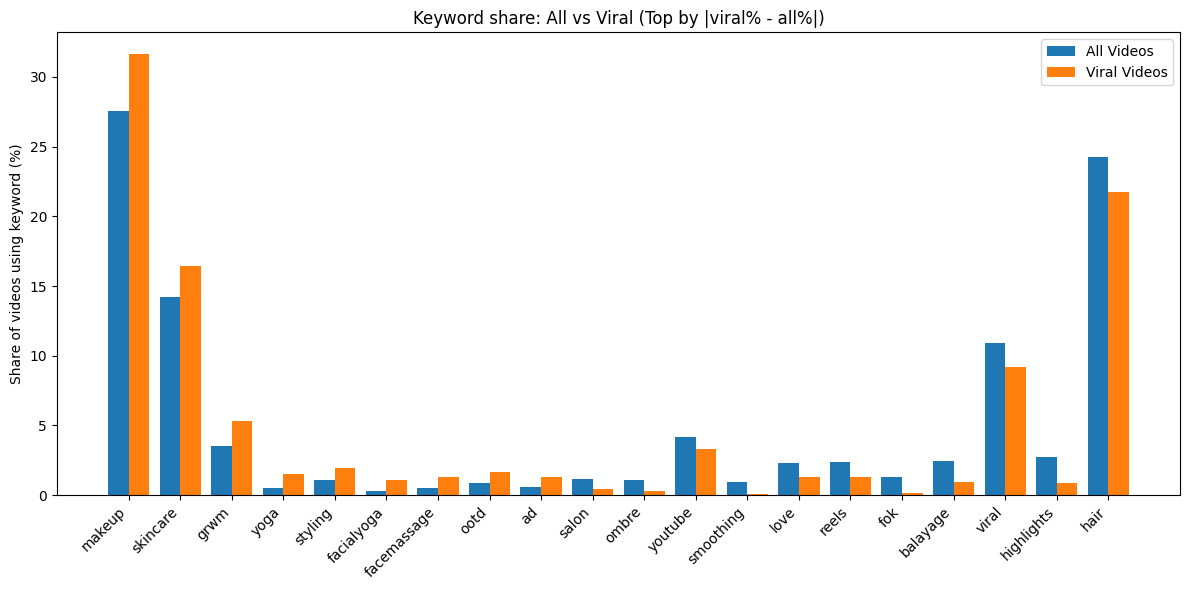

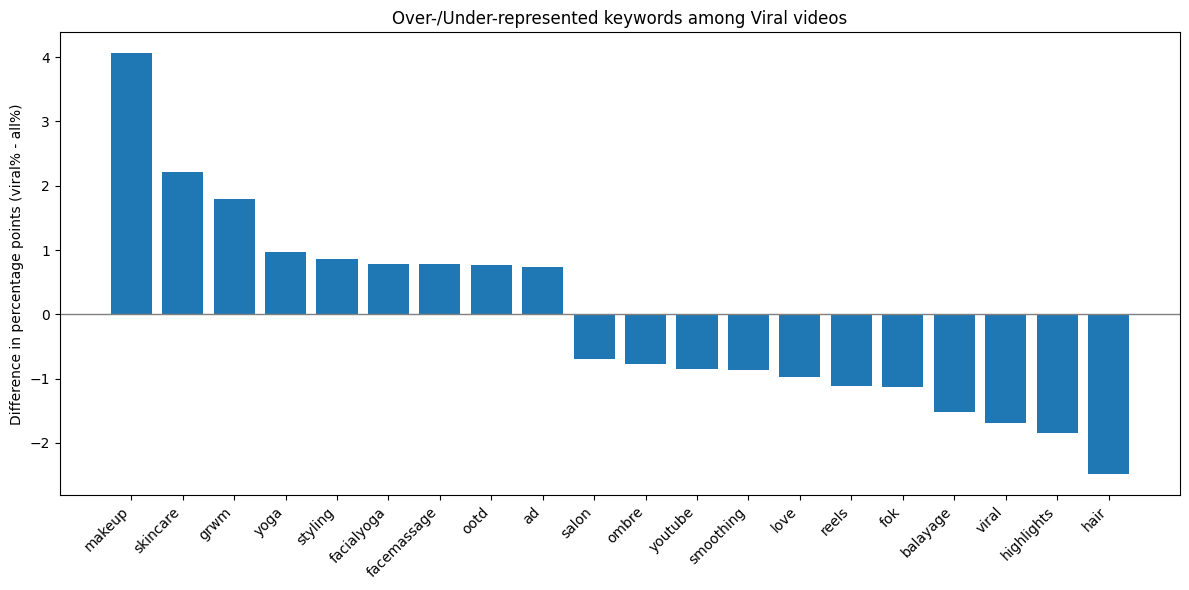

All (%)  Viral (%)  Δ (Viral - All, pp)
allTags_cleaned                                         
makeup             27.55      31.61                 4.06
skincare           14.24      16.44                 2.21
grwm                3.55       5.35                 1.80
yoga                0.55       1.51                 0.96
styling             1.07       1.94                 0.86
facialyoga          0.30       1.09                 0.79
facemassage         0.51       1.29                 0.78
ootd                0.91       1.67                 0.76
ad                  0.58       1.32                 0.74
salon               1.17       0.48                -0.70
ombre               1.08       0.30                -0.77
youtube             4.19       3.34                -0.85
smoothing           0.96       0.10                -0.86
love                2.30       1.31                -0.98
reels               2.41       1.30                -1.11
fok                 1.32       0.18                -1.14
balayage            2.44       0.92                -1.52
viral              10.91       9.21                -1.70
highlights          2.71       0.86                -1.85
hair               24.26      21.77                -2.49

In [57]:
# --- SET THIS ONCE: your full cleaned dataset with at least ['videoId','allTags_cleaned'] ---
all_videos_df = df  # <-- replace 'df' with your actual full cleaned dataframe variable

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import itertools

# -------------------------
# 1) Build the VIRAL (outlier) set the same way you did
# -------------------------
view_outliers_df = outlier_info['viewCount']['top_outliers']
like_outliers_df = outlier_info['likeCount']['top_outliers']
comment_outliers_df = outlier_info['commentCount']['top_outliers']

viral_videos_df = (
    pd.concat([view_outliers_df, like_outliers_df, comment_outliers_df], ignore_index=True)
      .drop_duplicates(subset=['videoId'])
)

# -------------------------
# 2) Helper to compute % of videos containing each keyword (per set)
#    - Uses unique videoId per tag to avoid double-counting
# -------------------------
def keyword_share_per_video(df_with_tags, tag_col='allTags_cleaned', id_col='videoId'):
    tmp = df_with_tags[[id_col, tag_col]].dropna().copy()
    # explode tags list
    tmp = tmp.explode(tag_col)
    # clean tag text a bit
    tmp[tag_col] = tmp[tag_col].astype(str).str.strip().str.lower()
    tmp = tmp[tmp[tag_col] != '']
    # unique videos per tag
    vids_per_tag = tmp.groupby(tag_col)[id_col].nunique()
    # denominator = unique videos (that have at least one tag) in this set
    denom = tmp[id_col].nunique()
    share_pct = (vids_per_tag / denom) * 100.0
    return share_pct.sort_values(ascending=False)

# -------------------------
# 3) Compute shares for ALL vs VIRAL sets
# -------------------------
all_share = keyword_share_per_video(all_videos_df, tag_col='allTags_cleaned', id_col='videoId')
viral_share = keyword_share_per_video(viral_videos_df,    tag_col='allTags_cleaned', id_col='videoId')

# Combine and align indices
comp = pd.concat(
    [all_share.rename('all_pct'),
     viral_share.rename('viral_pct')],
    axis=1
).fillna(0.0)

# Difference = over/under-representation in viral set
comp['diff'] = comp['viral_pct'] - comp['all_pct']

# -------------------------
# 4) Plot A: Grouped bar chart for top tags (by |diff|)
# -------------------------
top_n = 20
top_idx = comp['diff'].abs().sort_values(ascending=False).head(top_n).index
plot_df = comp.loc[top_idx].sort_values('diff', ascending=False)

x = np.arange(len(plot_df))
width = 0.4

plt.figure(figsize=(12,6))
plt.bar(x - width/2, plot_df['all_pct'], width, label='All Videos')
plt.bar(x + width/2, plot_df['viral_pct'], width, label='Viral Videos')
plt.xticks(x, plot_df.index, rotation=45, ha='right')
plt.ylabel('Share of videos using keyword (%)')
plt.title('Keyword share: All vs Viral (Top by |viral% - all%|)')
plt.legend()
plt.tight_layout()
plt.show()

# -------------------------
# 5) Plot B: Difference chart (viral% - all%), sorted
# -------------------------
plt.figure(figsize=(12,6))
plt.bar(plot_df.index, plot_df['diff'])
plt.axhline(0, linewidth=1, color='gray')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Difference in percentage points (viral% - all%)')
plt.title('Over-/Under-represented keywords among Viral videos')
plt.tight_layout()
plt.show()

# -------------------------
# 6) (Optional) Pretty table for reporting
# -------------------------
report = plot_df[['all_pct','viral_pct','diff']].round(2)
report = report.rename(columns={
    'all_pct': 'All (%)',
    'viral_pct': 'Viral (%)',
    'diff': 'Δ (Viral - All, pp)'
})
report


#Exporting cleaned Data Frame to a new csv file

In [58]:
#The current Data Frame is export into a csv file that will be used in model training
df.to_csv('cleaned_data.csv', index=False)